Bước 1: Tiền xử lý dữ liệu

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Semes_4/AI/job_recommendation_final3/dataset.xlsx'

#In ra bảng dữ liệu
df = pd.read_excel(file_path)
df.head()

,Sr.No.,Course,Job profession,Student,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,...,Naturalist,s/p,P1,P2,P3,P4,P5,P6,P7,P8
0,NaN,NaN,"Công an, Cảnh sát, Quân đội",S3474,8,5,19,15,13,18,...,13,s3474,POOR,POOR,BEST,BEST,AVG,BEST,AVG,AVG
1,NaN,NaN,"Công an, Cảnh sát, Quân đội",S3419,5,5,20,16,14,17,...,14,s3419,POOR,POOR,BEST,BEST,AVG,BEST,AVG,AVG
2,NaN,NaN,"Công an, Cảnh sát, Quân đội",S3519,5,5,17,20,13,20,...,13,s3519,POOR,POOR,BEST,BEST,AVG,BEST,AVG,AVG
3,NaN,NaN,"Công an, Cảnh sát, Quân đội",S3479,5,5,20,16,14,15,...,14,s3479,POOR,POOR,BEST,BEST,AVG,BEST,AVG,AVG
4,NaN,NaN,"Công an, Cảnh sát, Quân đội",S3477,5,7,16,18,12,16,...,12,s3477,POOR,POOR,BEST,BEST,AVG,BEST,AVG,AVG


In [ ]:
#Lấy danh sách các nghề và lưu lại
unique_jobs = df['Job profession'].unique().tolist()

job_list_path = "/content/drive/MyDrive/Semes_4/AI/job_recommendation_final3/job_list.txt"
with open(job_list_path, 'w', encoding='utf-8') as file:
    for job in unique_jobs:
        file.write(job + '\n')
print(unique_jobs)

['Công an, Cảnh sát, Quân đội', 'Nhà thiên văn học', 'Nhà địa chất học', 'Nhà sinh vật học biển', 'Bác sĩ thú y', 'Nhiếp ảnh gia thiên nhiên', 'Kỹ sư thu âm', 'Chuyên gia thính học', 'Biên tập viên âm thanh', 'Giáo viên âm nhạc', 'Chuyên gia tính toán bảo hiểm', 'Kế toán công chứng', 'Chuyên viên phân tích máy tính', 'Lập trình viên máy tính', 'Nhà thiết kế cơ sở dữ liệu', 'Nhà kinh tế học', 'Thủ thư', 'Kỹ sư', 'Luật sư', 'Dược sĩ', 'Bác sĩ', 'Nhà vật lý học', 'Nhà toán học', 'Nhà lãnh đạo', 'Quản lý', 'Chính trị gia', 'Nhân viên công tác xã hội', 'Nhân viên lễ tân', 'Đại diện kinh doanh', 'Cố vấn', 'Vận động viên', 'Thợ cơ khí', 'Diễn viên', 'Nhà trị liệu vật lý', 'Biên tập viên', 'Nhà sử học', 'Nhà báo', 'Giáo viên ngôn ngữ', 'Nhà thơ', 'Phát thanh viên', 'Nghệ sĩ', 'Nhà thiết kế đồ họa', 'Nhà thiết kế thời trang', 'Nhà trang trí nội thất', 'Phi công', 'Nhà tâm lý học', 'Nhà triết học', 'Nhà văn', 'Nhà tội phạm học', 'Thư ký công ty', 'Tiếp thị', 'Quản lý logistics', 'Chuyên viên phâ

In [ ]:
# Chọn các cột cần thiết: 8 loại trí thông minh và Job profession
columns_to_keep = ['Job profession', 'Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical',
                   'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']
df_cleaned = df[columns_to_keep]

# Xử lý giá trị thiếu (nếu có) bằng cách điền giá trị trung bình cho các cột điểm số
for col in columns_to_keep[1:]:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# Xóa các dòng có giá trị thiếu trong cột 'Job profession'
df_cleaned = df_cleaned.dropna(subset=['Job profession'])

# Loại bỏ các giá trị trùng lặp
df_cleaned = df_cleaned.drop_duplicates()

# Xóa khoảng trắng thừa trong cột 'Job profession'
df_cleaned['Job profession'] = df_cleaned['Job profession'].str.strip()

df_cleaned.head()

<ipython-input-4-6eb025888f83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())


,Job profession,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,"Công an, Cảnh sát, Quân đội",8,5,19,15,13,18,11,13
1,"Công an, Cảnh sát, Quân đội",5,5,20,16,14,17,11,14
2,"Công an, Cảnh sát, Quân đội",5,5,17,20,13,20,11,13
3,"Công an, Cảnh sát, Quân đội",5,5,20,16,14,15,13,14
4,"Công an, Cảnh sát, Quân đội",5,7,16,18,12,16,11,12


In [ ]:
# Chuẩn hóa điểm số về khoảng [0, 1] bằng Min-Max Scaling
for col in columns_to_keep[1:]:  # Bỏ qua cột 'Job profession'
    df_cleaned[col] = (df_cleaned[col] - df_cleaned[col].min()) / (df_cleaned[col].max() - df_cleaned[col].min())

df_cleaned.head()

,Job profession,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,"Công an, Cảnh sát, Quân đội",0.2,0.000000,0.933333,0.666667,0.533333,0.866667,0.400000,0.65
1,"Công an, Cảnh sát, Quân đội",0.0,0.000000,1.000000,0.733333,0.600000,0.800000,0.400000,0.70
2,"Công an, Cảnh sát, Quân đội",0.0,0.000000,0.800000,1.000000,0.533333,1.000000,0.400000,0.65
3,"Công an, Cảnh sát, Quân đội",0.0,0.000000,1.000000,0.733333,0.600000,0.666667,0.533333,0.70
4,"Công an, Cảnh sát, Quân đội",0.0,0.133333,0.733333,0.866667,0.466667,0.733333,0.400000,0.60


In [ ]:
df_cleaned['job_label'] = df_cleaned['Job profession'].astype('category').cat.codes

# Lưu mapping giữa nhãn gốc và nhãn mã hóa
label_mapping = dict(enumerate(df_cleaned['Job profession'].astype('category').cat.categories))

print("Mapping giữa nhãn gốc và nhãn mã hóa:")
print(label_mapping)

label_df = pd.DataFrame(list(label_mapping.items()), columns=['Label_Code', 'Job_Profession'])
label_df.to_csv("label_mapping.csv", index=False)
label_df.to_csv('/content/drive/MyDrive/Semes_4/AI/job_recommendation_final3/label_mapping.csv')

Mapping giữa nhãn gốc và nhãn mã hóa:
{0: 'Biên tập viên', 1: 'Biên tập viên âm thanh', 2: 'Bác sĩ', 3: 'Bác sĩ thú y', 4: 'Chuyên gia thính học', 5: 'Chuyên gia tính toán bảo hiểm', 6: 'Chuyên viên phân tích kinh doanh', 7: 'Chuyên viên phân tích máy tính', 8: 'Chuyên viên phân tích nghiên cứu', 9: 'Chính trị gia', 10: 'Công an, Cảnh sát, Quân đội', 11: 'Cố vấn', 12: 'Cố vấn tài chính', 13: 'Diễn viên', 14: 'Dược sĩ', 15: 'Giám đốc tài chính', 16: 'Giáo viên mầm non', 17: 'Giáo viên ngôn ngữ', 18: 'Giáo viên tiểu học', 19: 'Giáo viên trung học, giáo viên trung học phổ thông và giảng viên đại học', 20: 'Giáo viên âm nhạc', 21: 'Kiểm toán viên nội bộ', 22: 'Kế toán công chứng', 23: 'Kỹ sư', 24: 'Kỹ sư thu âm', 25: 'Kỹ thuật viên', 26: 'Luật sư', 27: 'Lập trình viên máy tính', 28: 'Môi giới chứng khoán', 29: 'Nghệ sĩ', 30: 'Ngành y', 31: 'Ngân hàng', 32: 'Nhiếp ảnh gia thiên nhiên', 33: 'Nhà báo', 34: 'Nhà khảo cổ học', 35: 'Nhà kinh tế học', 36: 'Nhà lãnh đạo', 37: 'Nhà nhân chủng học',

Bước 2: Trực quan hoá dữ liệu

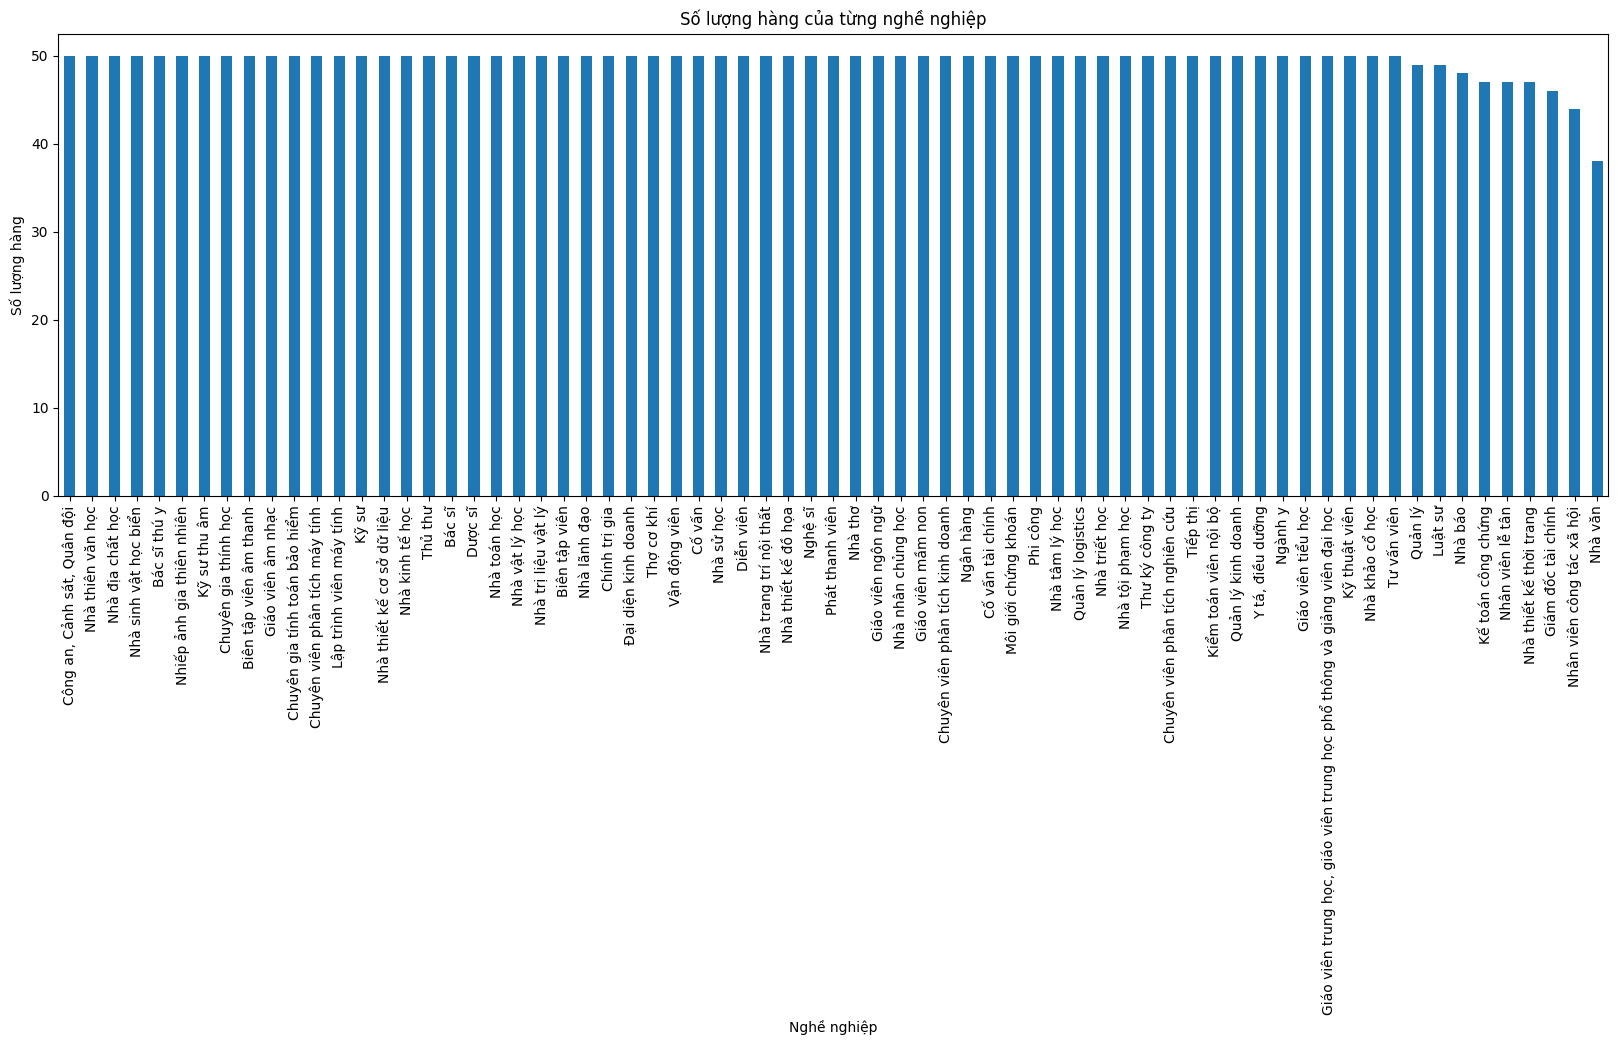

In [ ]:
import matplotlib.pyplot as plt

job_counts = df_cleaned['Job profession'].value_counts()

plt.figure(figsize=(20, 6))
job_counts.plot(kind='bar')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Số lượng hàng')
plt.title('Số lượng hàng của từng nghề nghiệp')
plt.show()

In [ ]:
print("Tổng số mẫu trong dữ liệu:", len(df_cleaned))

# Hiển thị phân phối nhãn
print("Phân phối nghề nghiệp:")
print(job_counts)

Tổng số mẫu trong dữ liệu: 3415
Phân phối nghề nghiệp:
Job profession
Công an, Cảnh sát, Quân đội    50
Nhà thiên văn học              50
Nhà địa chất học               50
Nhà sinh vật học biển          50
Bác sĩ thú y                   50
                               ..
Nhân viên lễ tân               47
Nhà thiết kế thời trang        47
Giám đốc tài chính             46
Nhân viên công tác xã hội      44
Nhà văn                        38
Name: count, Length: 69, dtype: int64


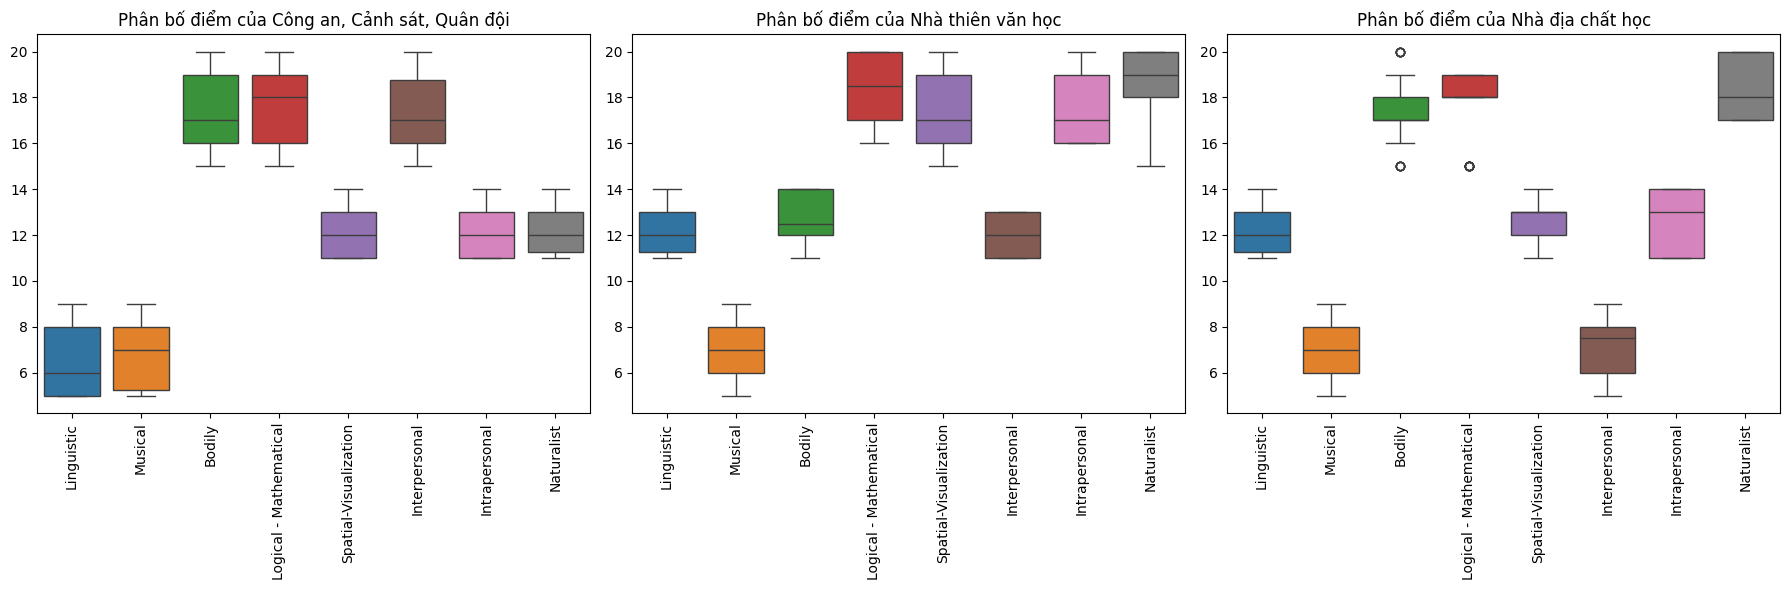

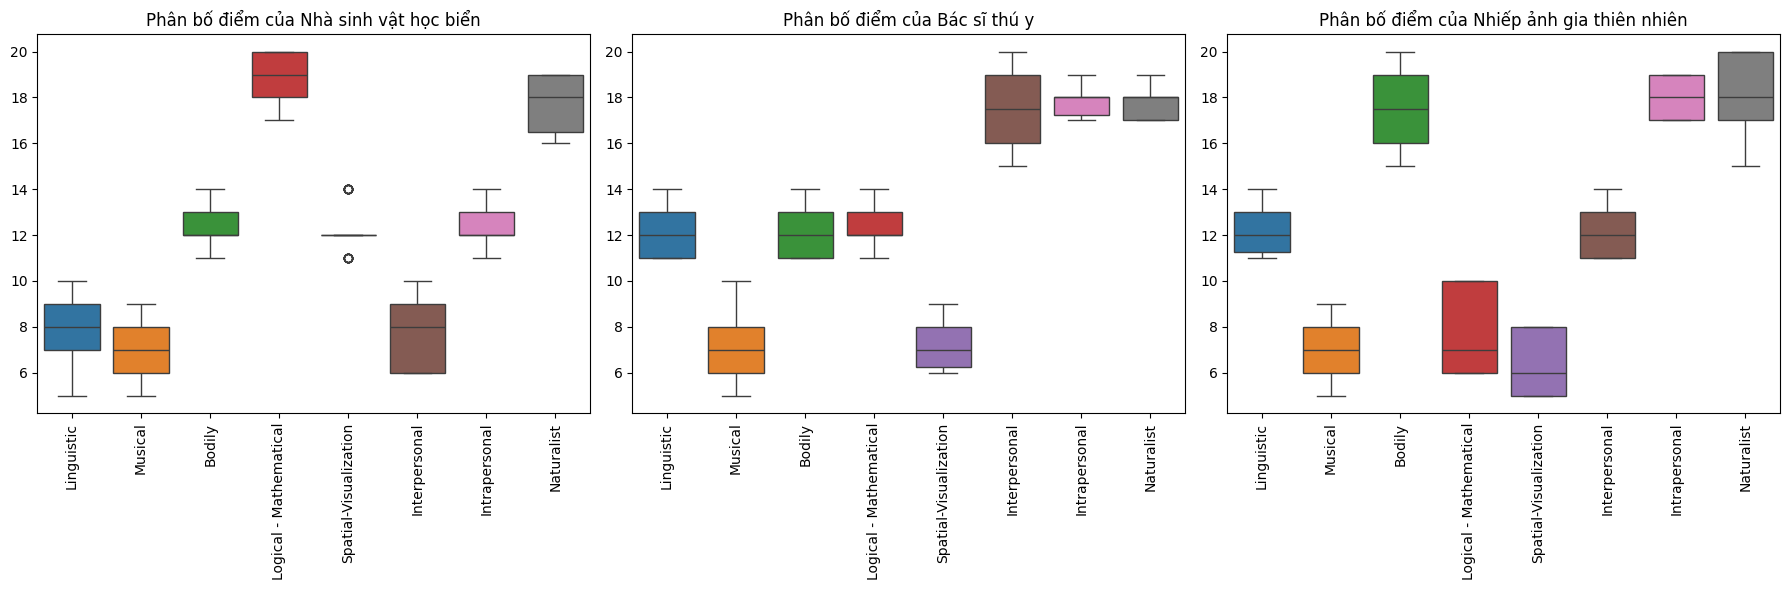

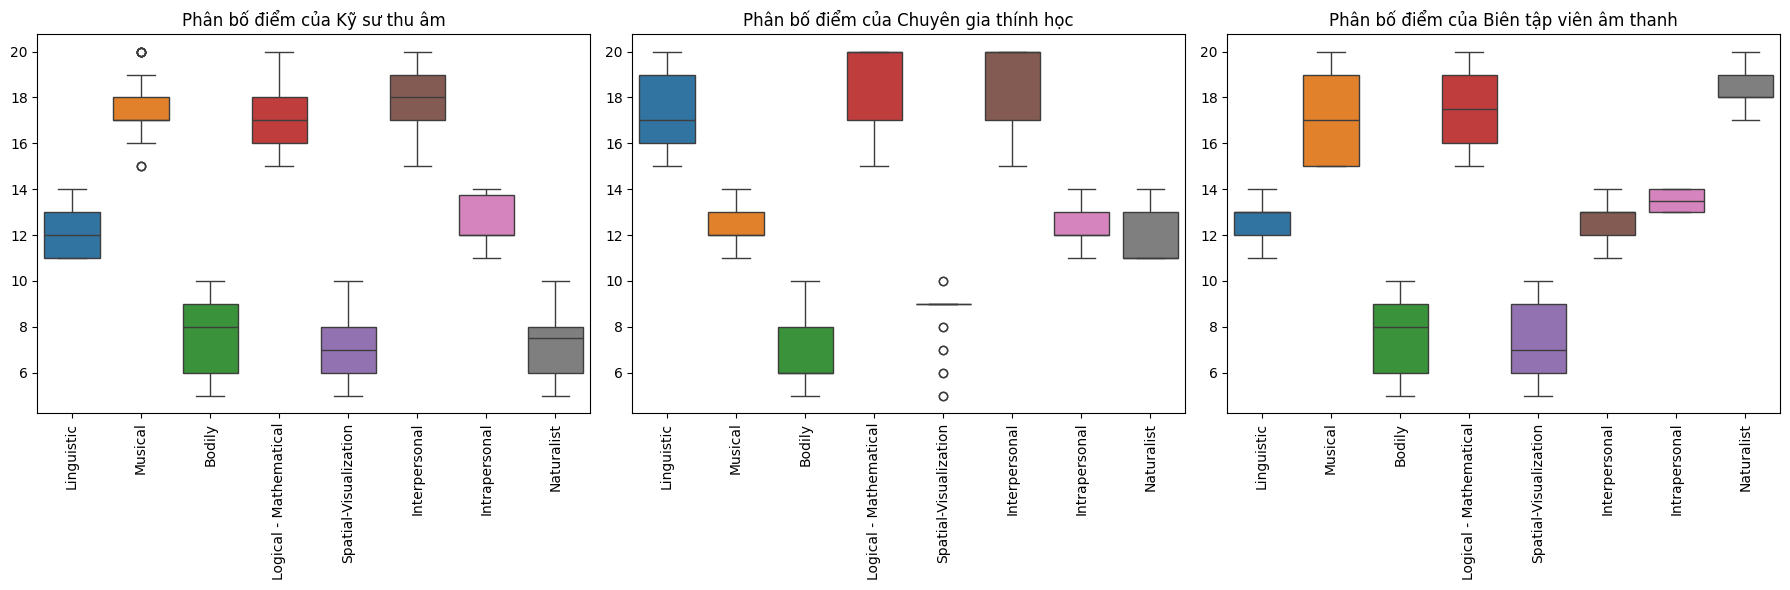

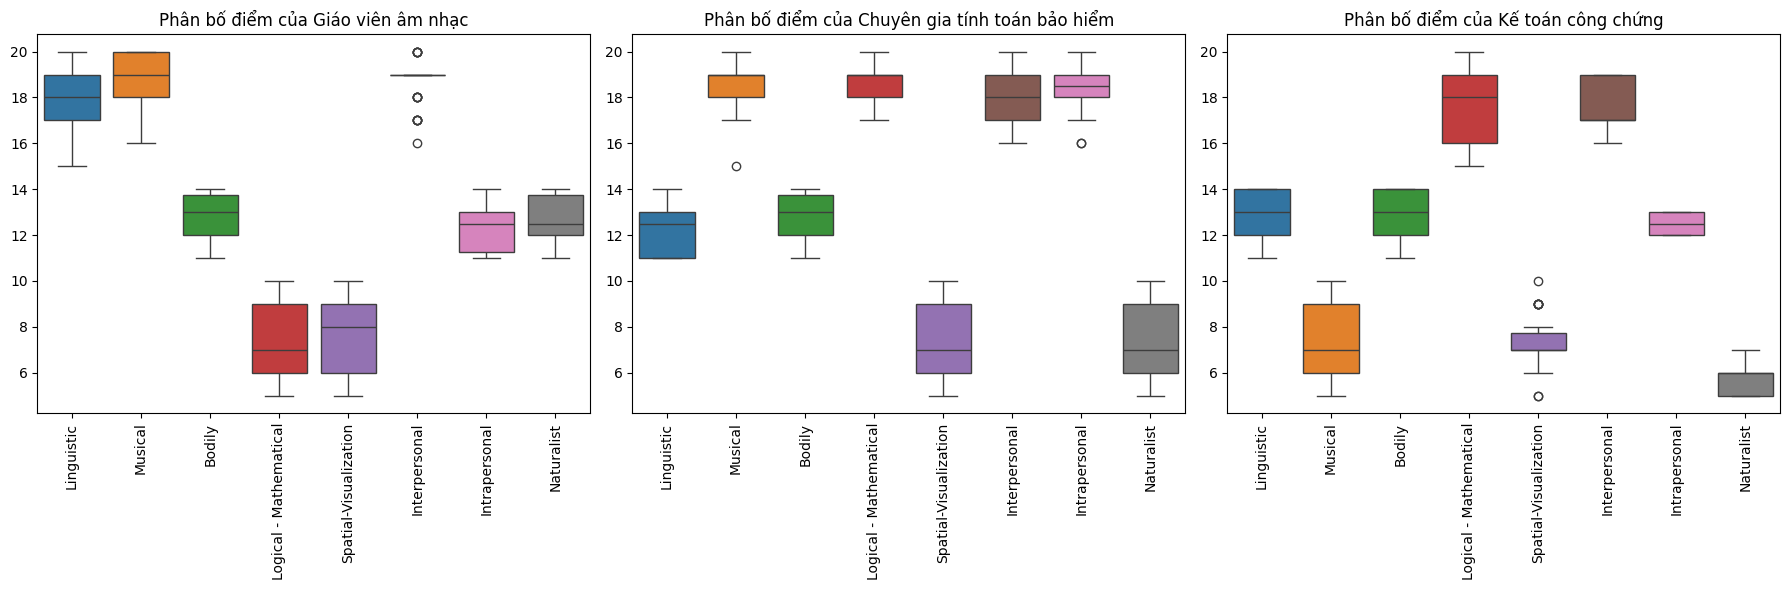

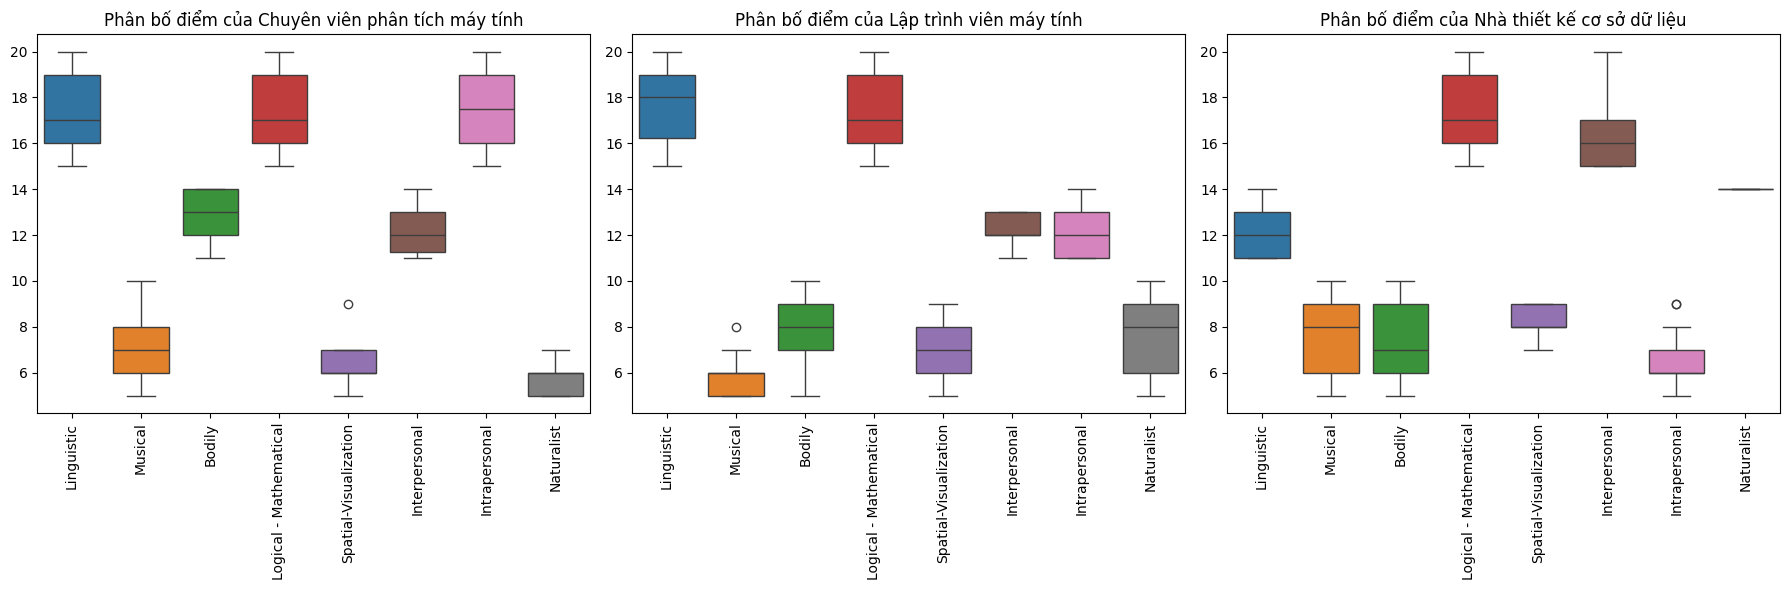

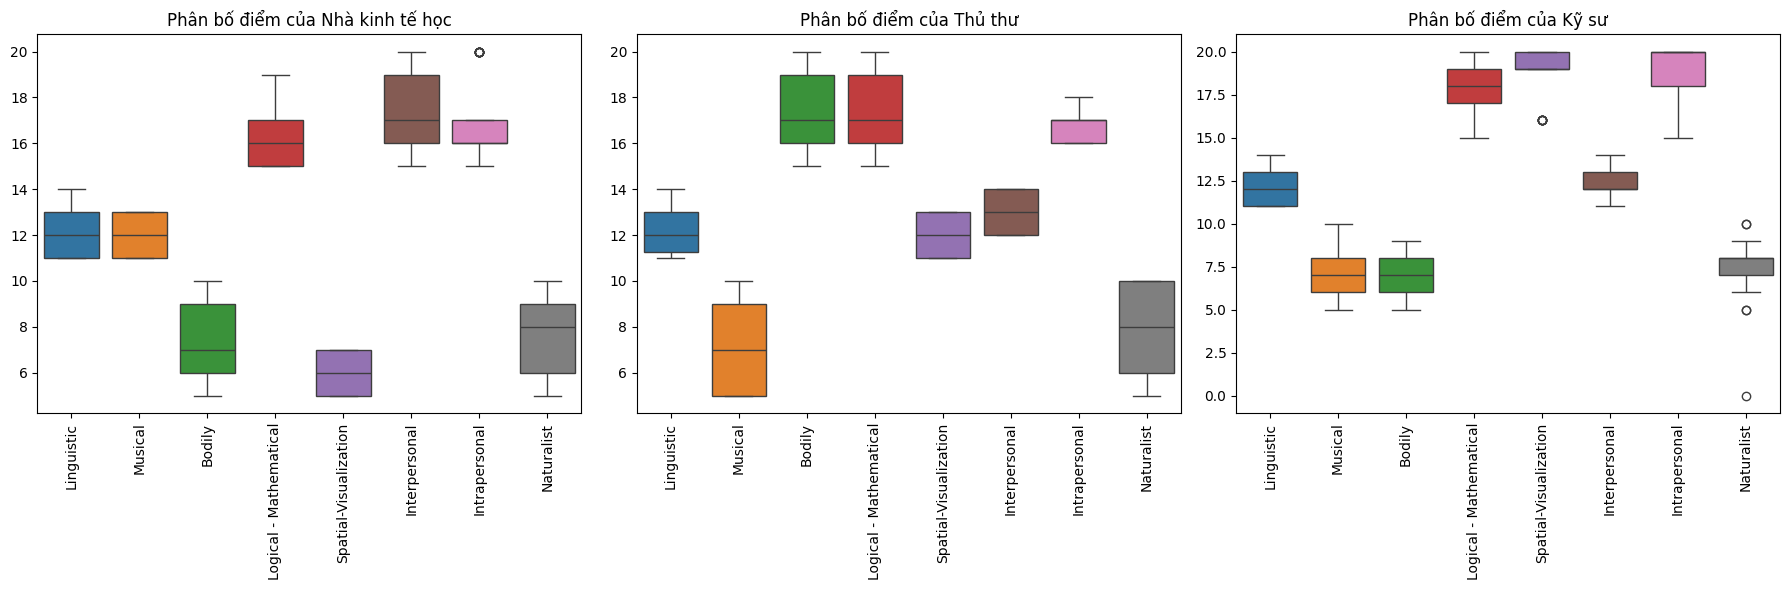

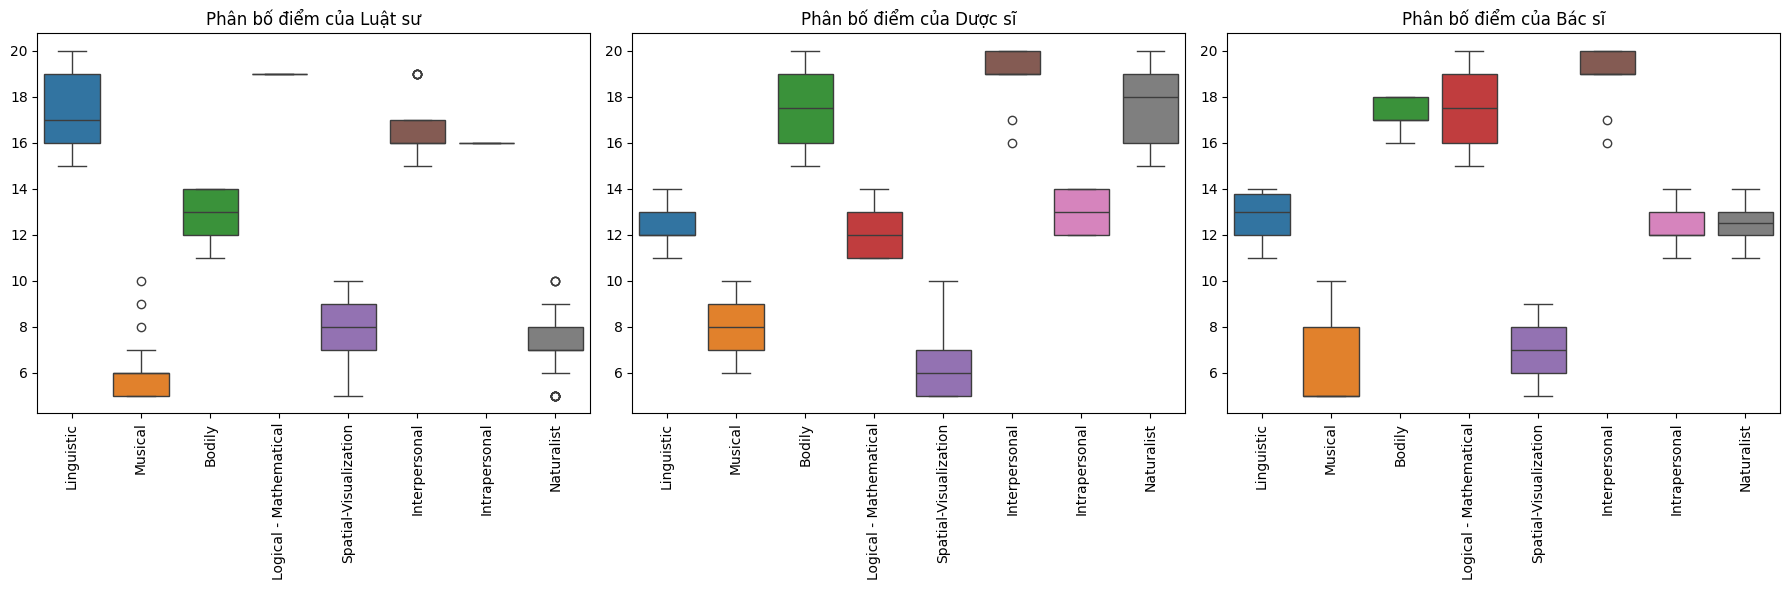

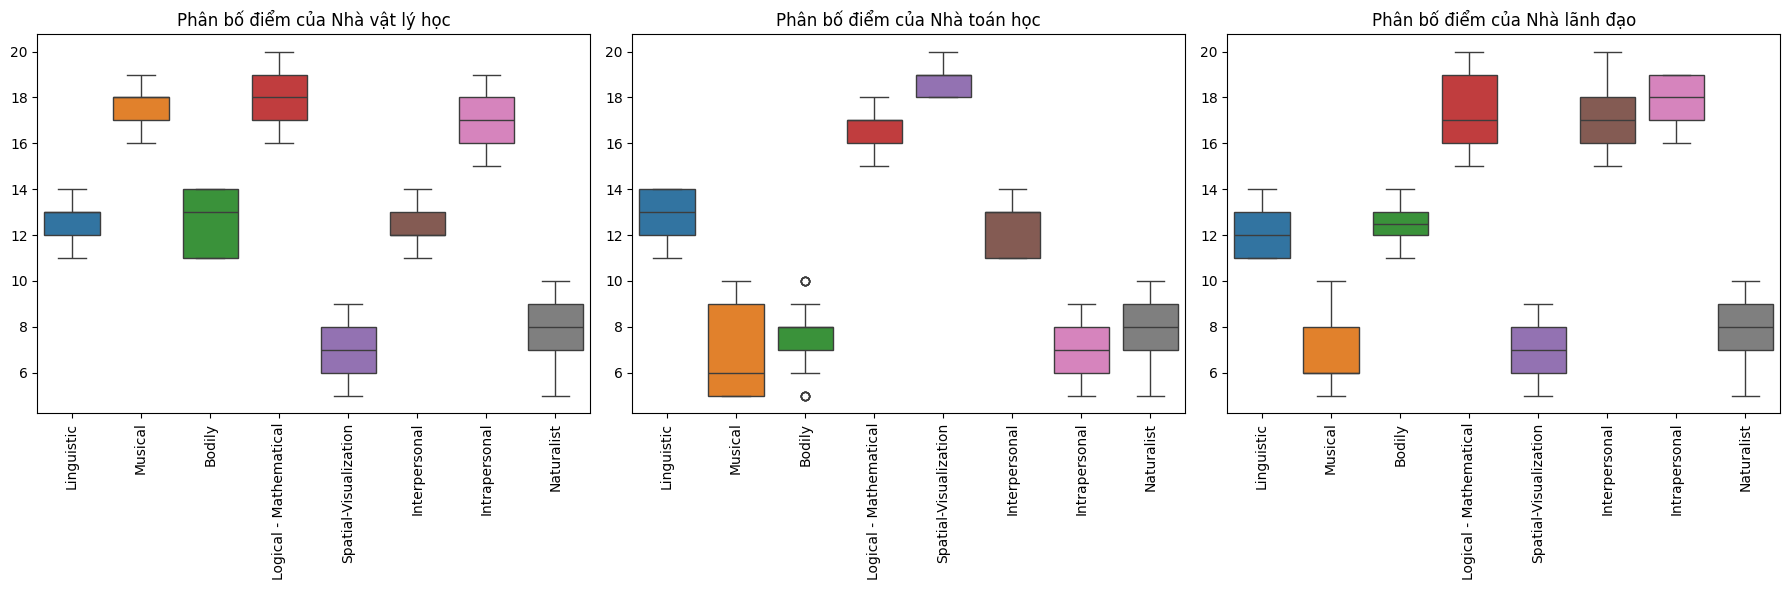

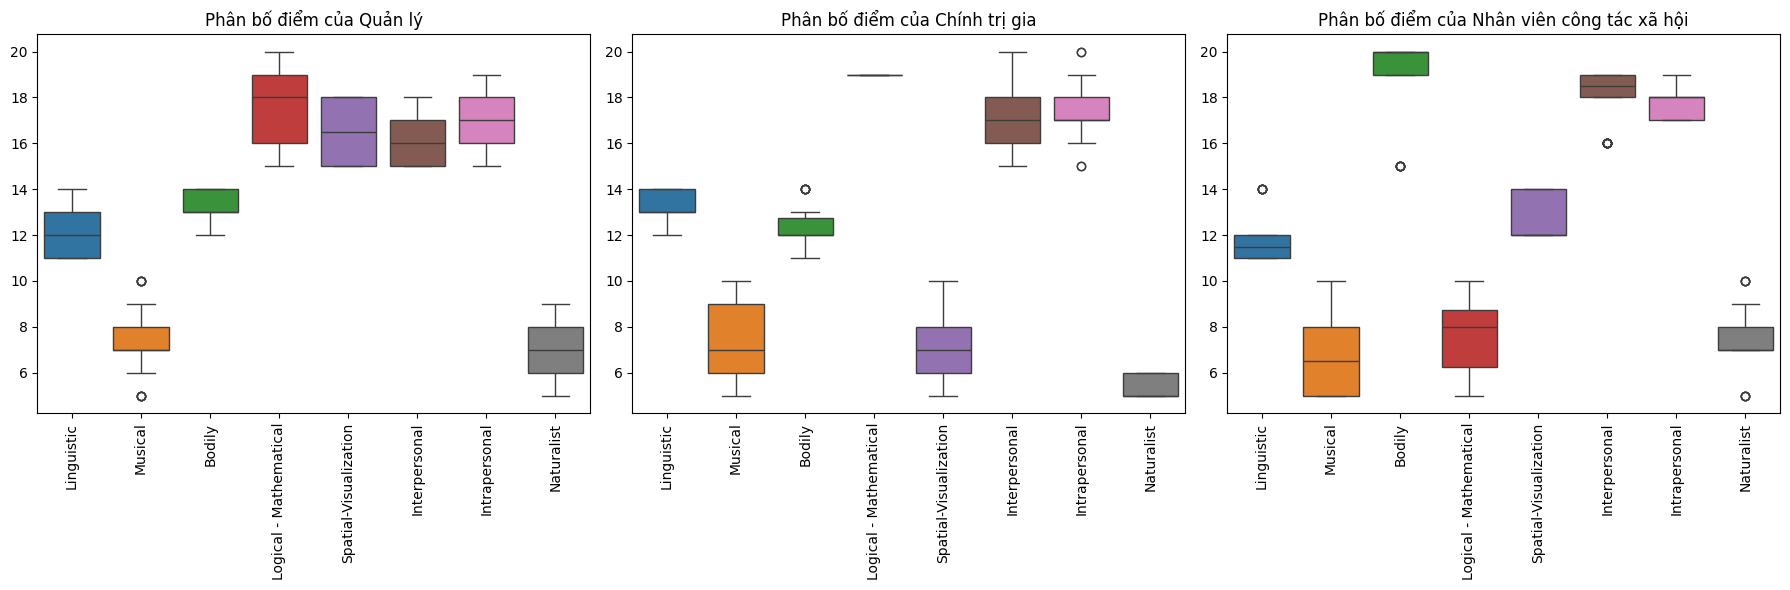

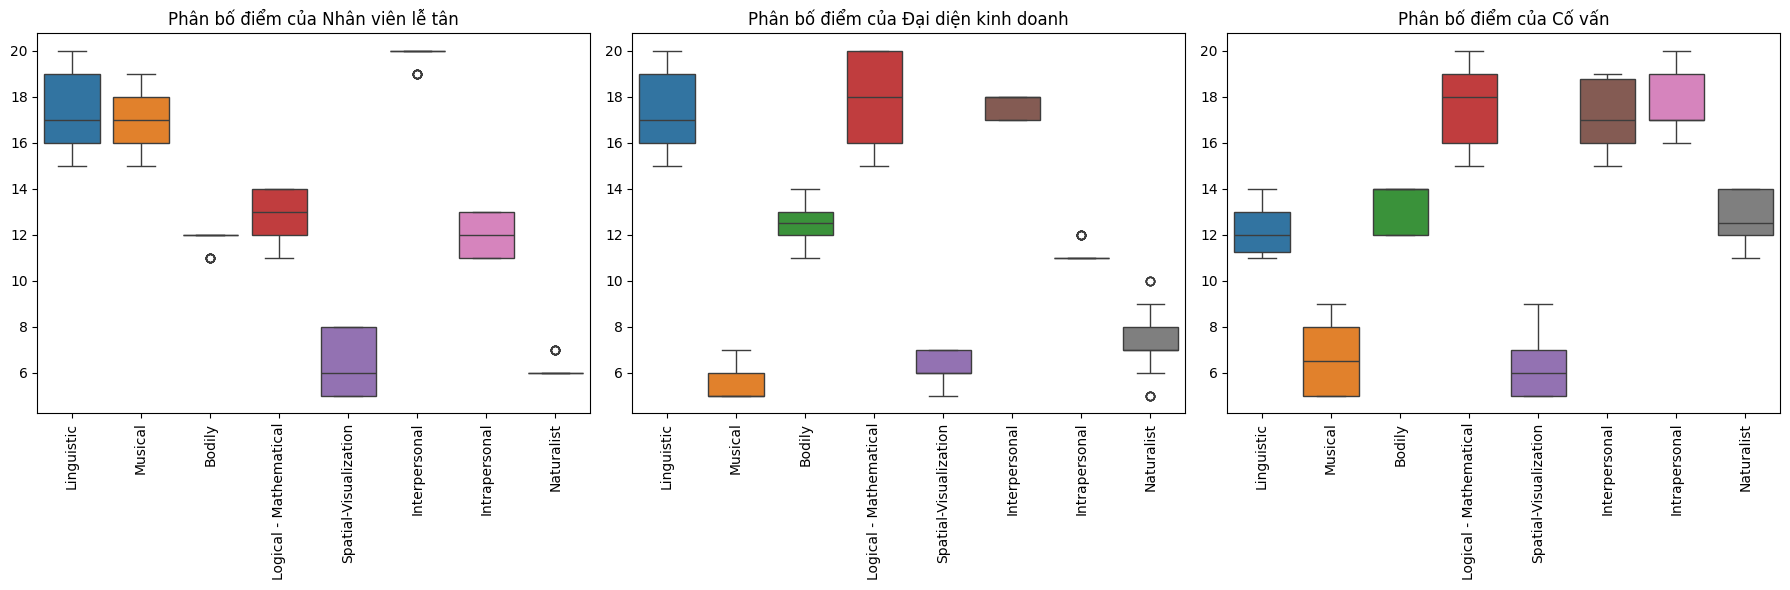

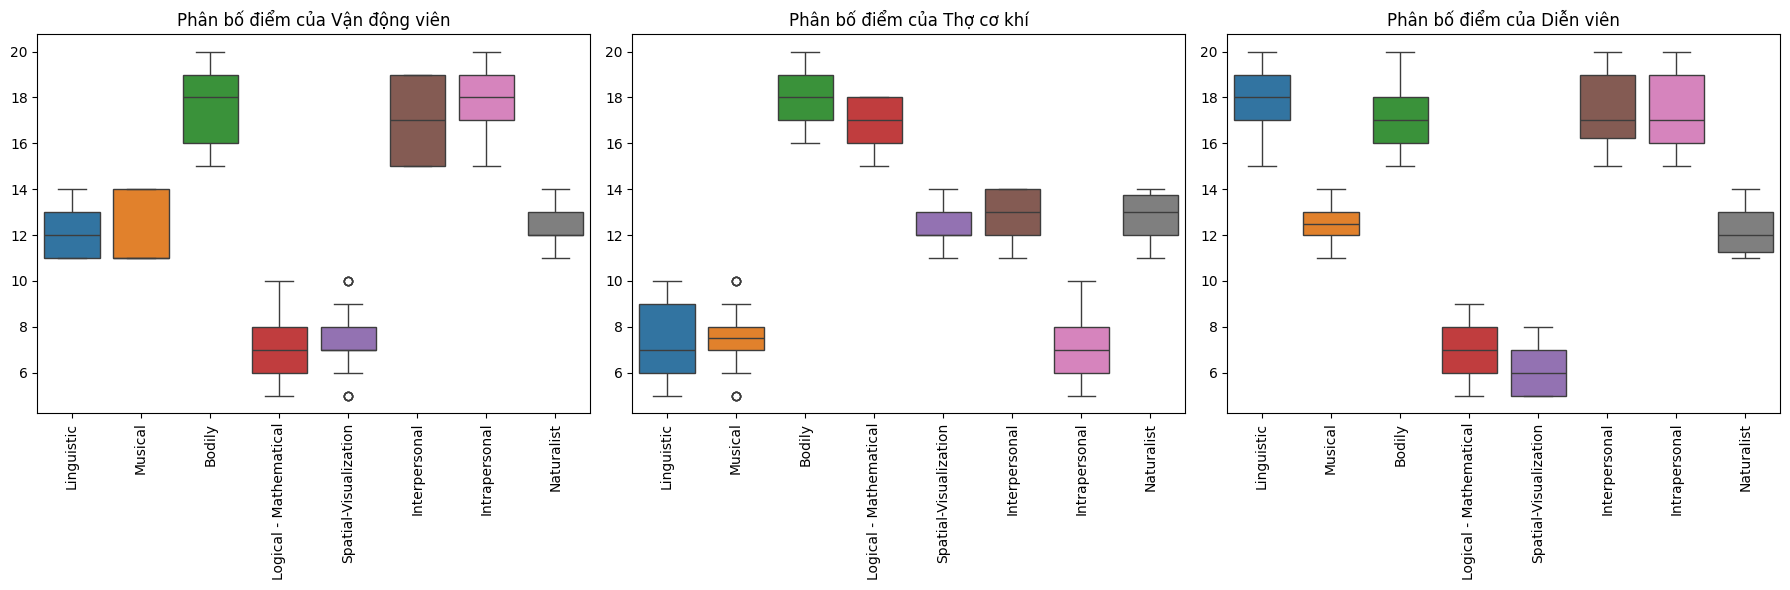

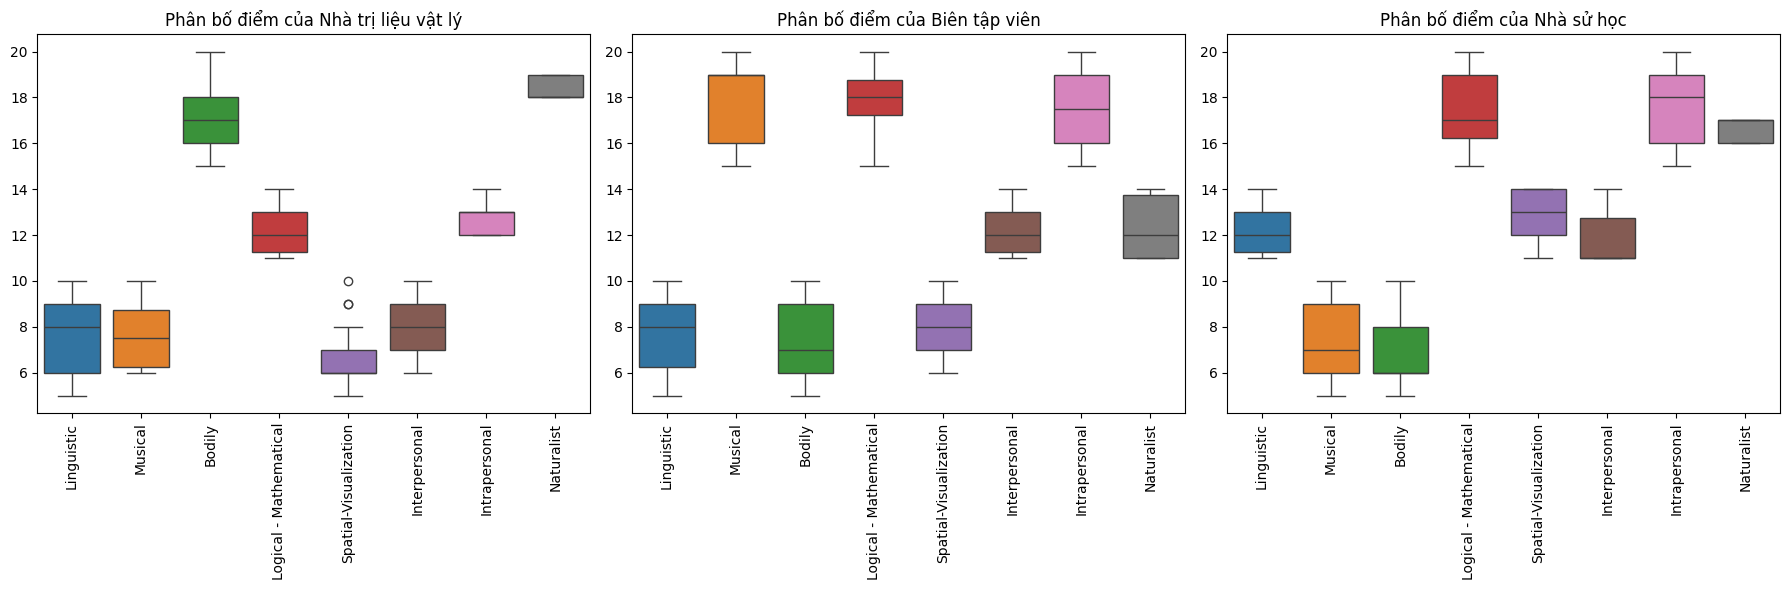

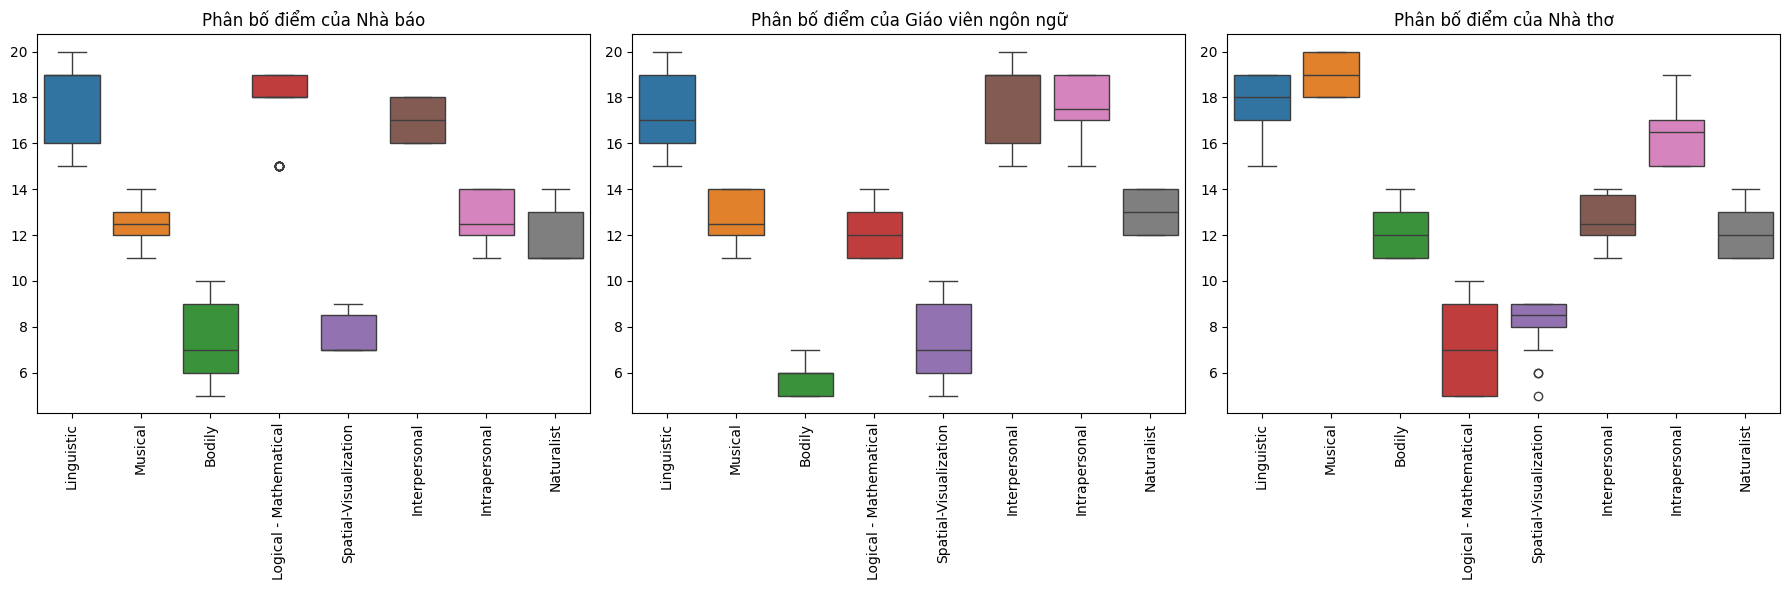

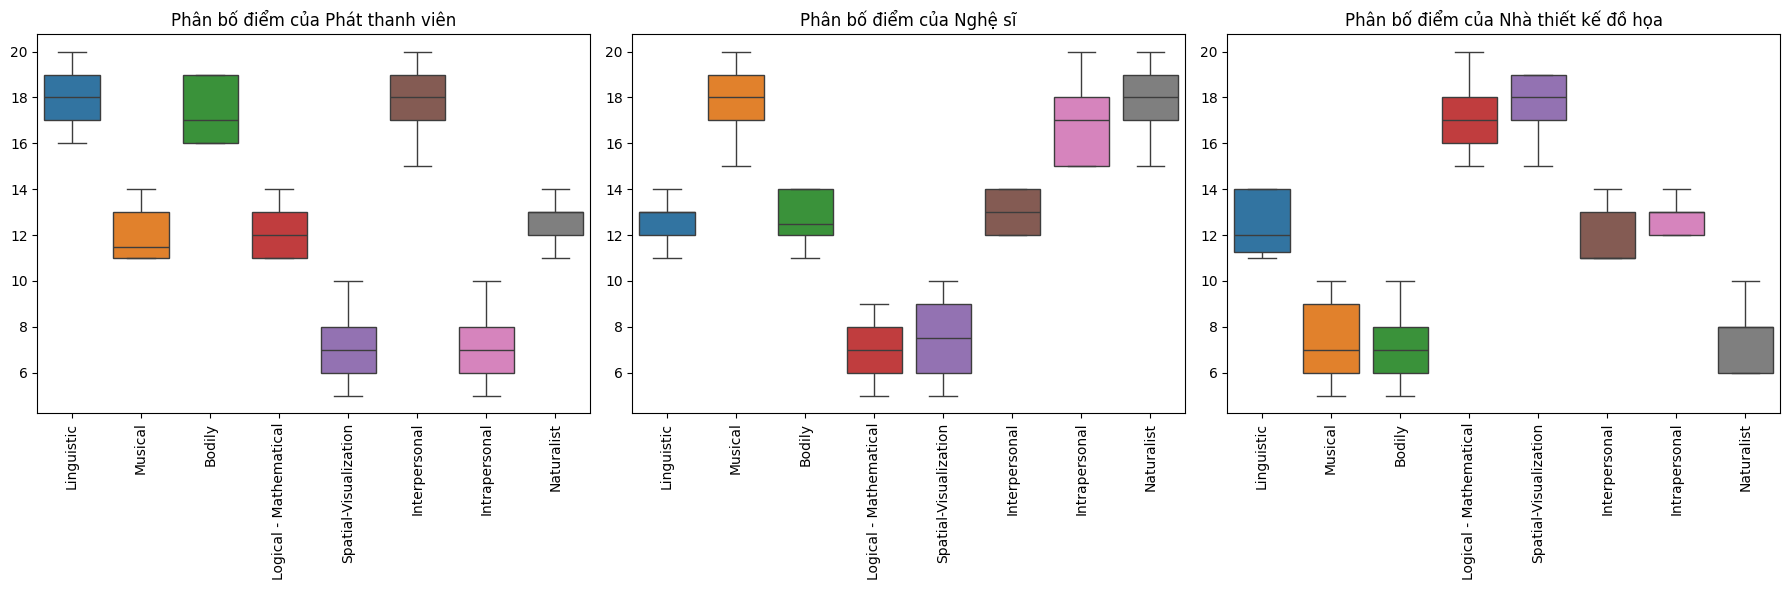

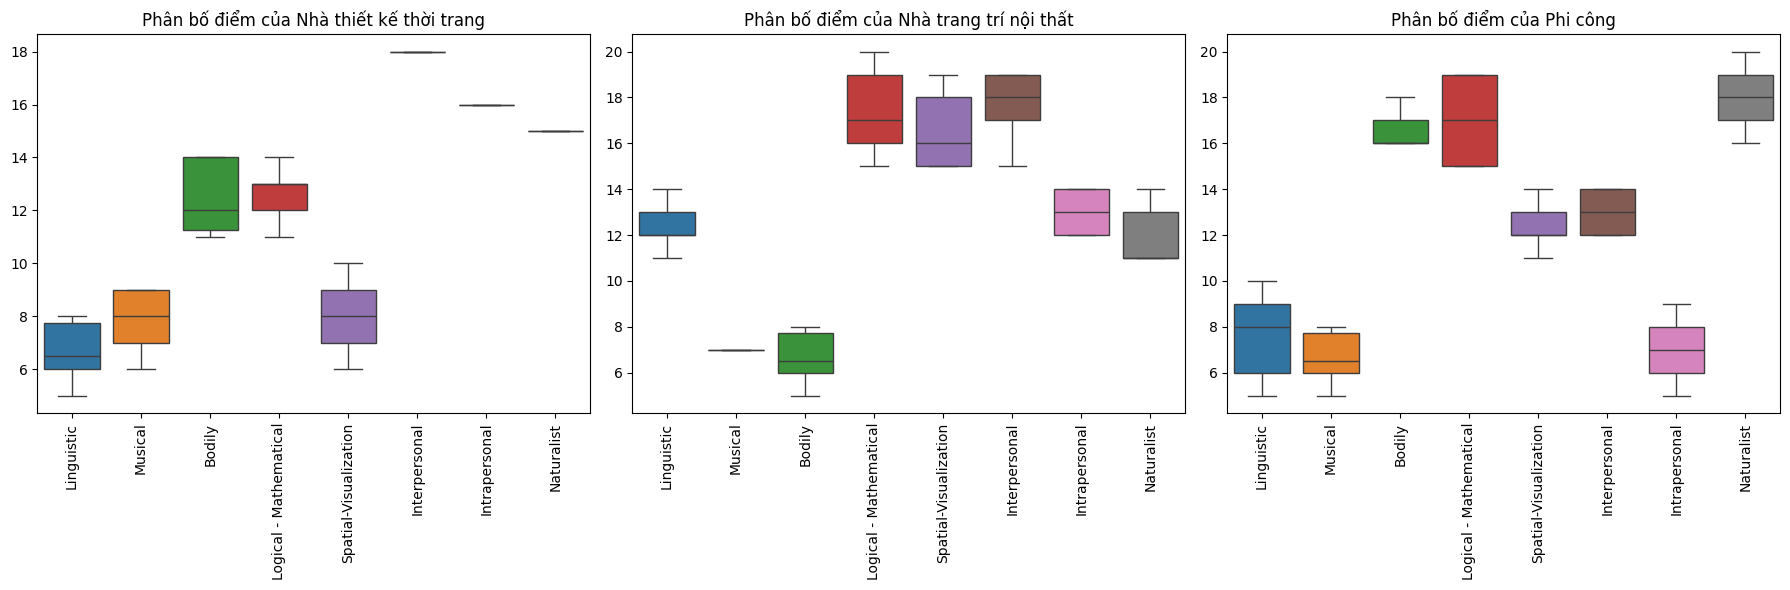

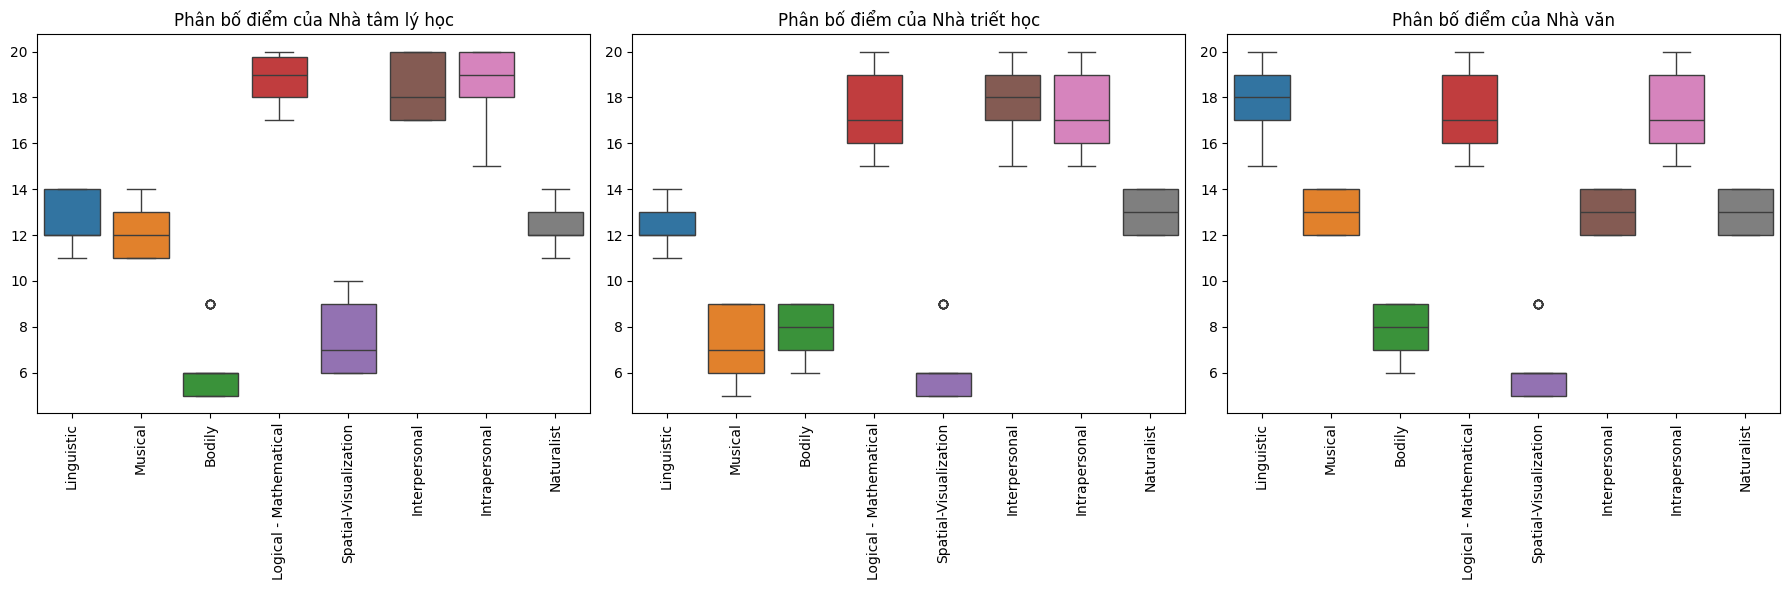

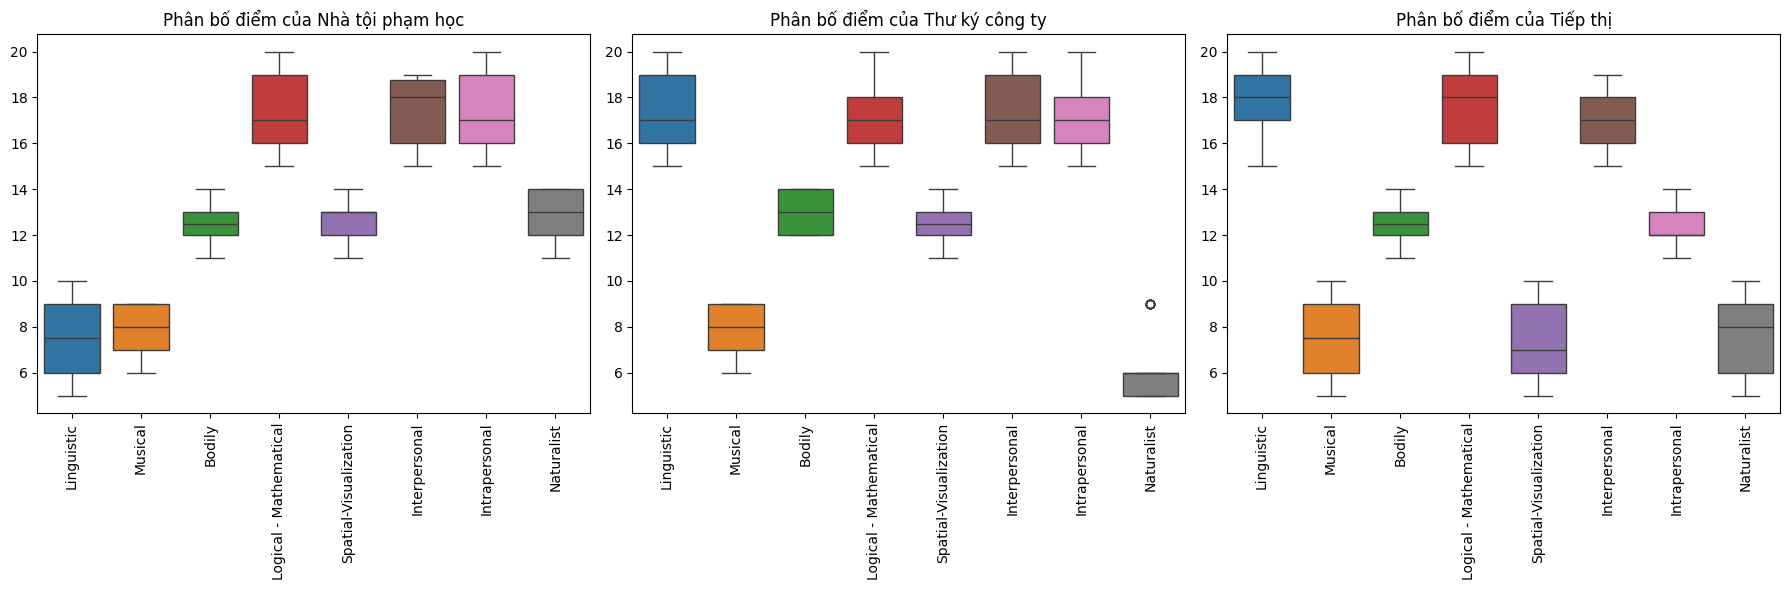

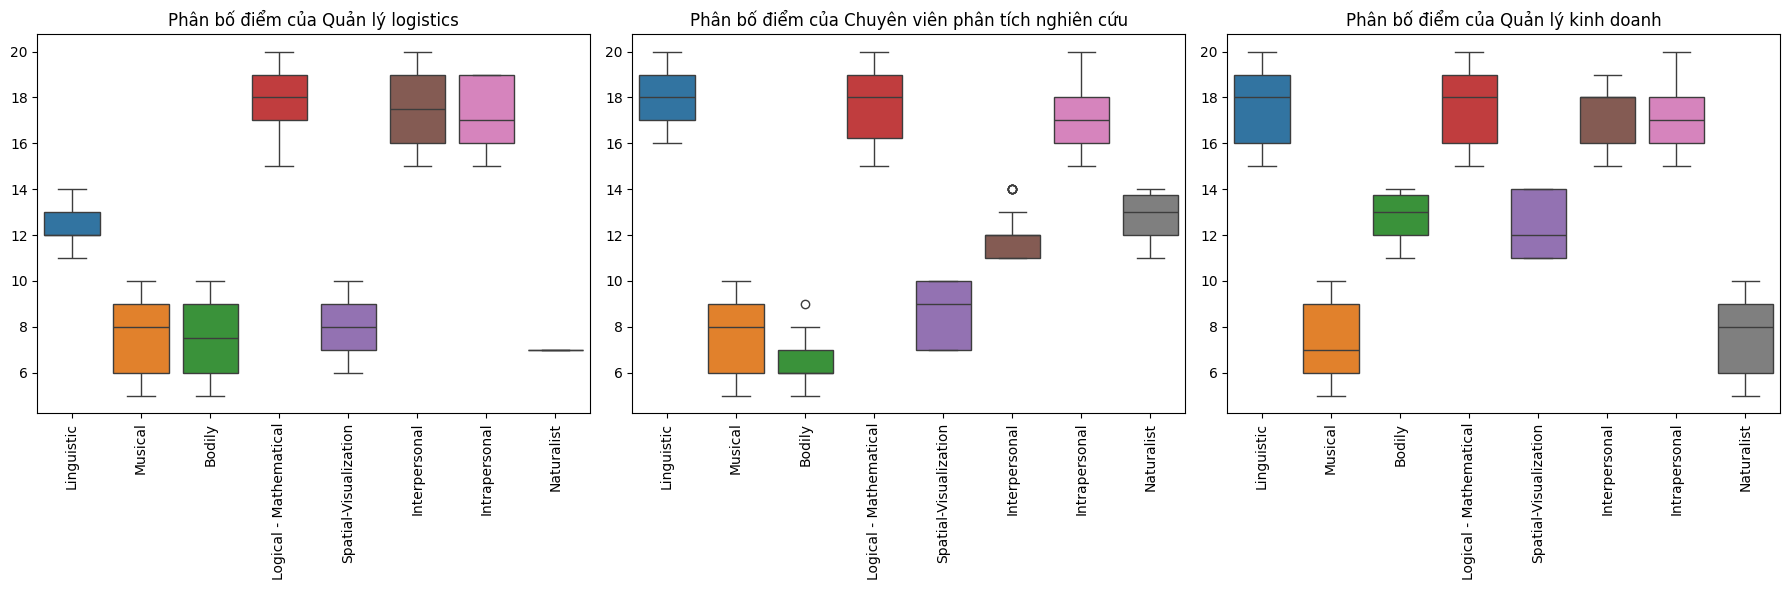

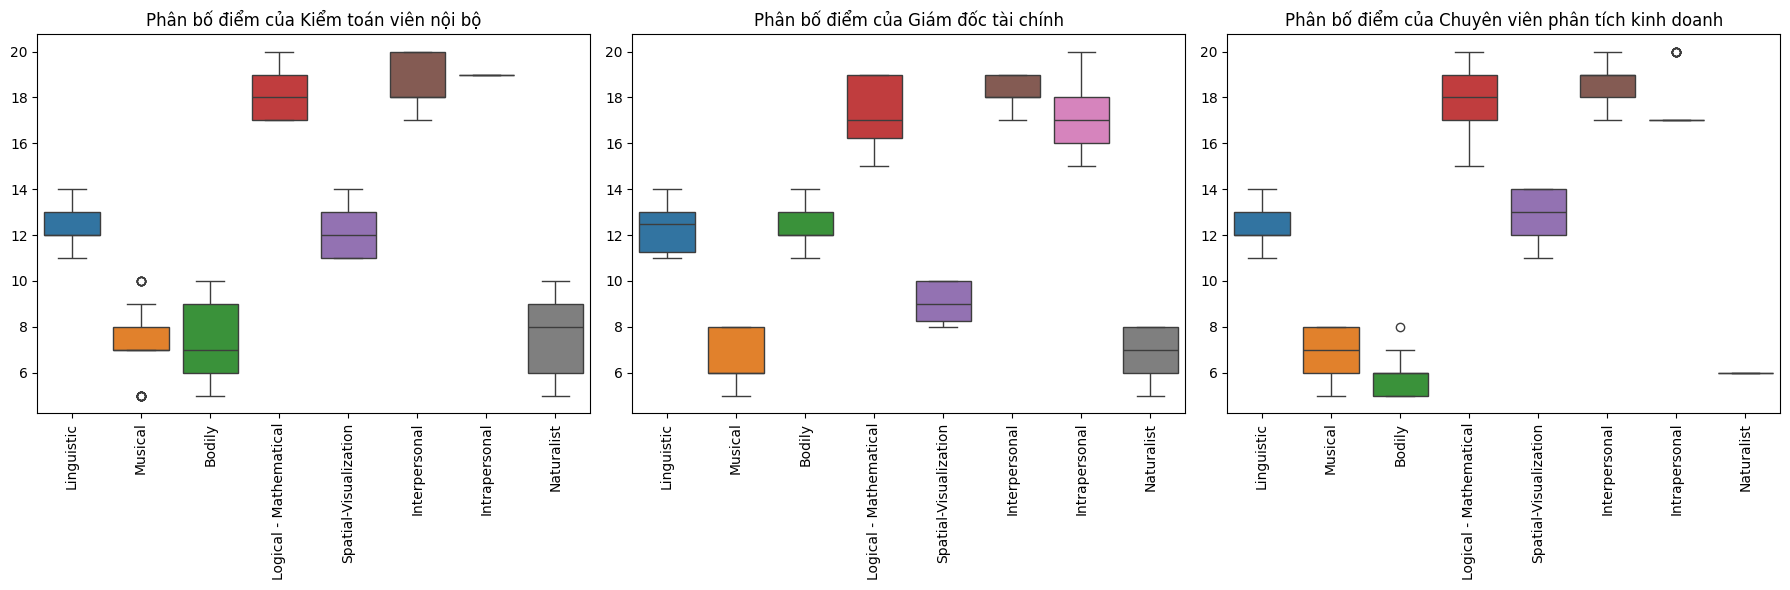

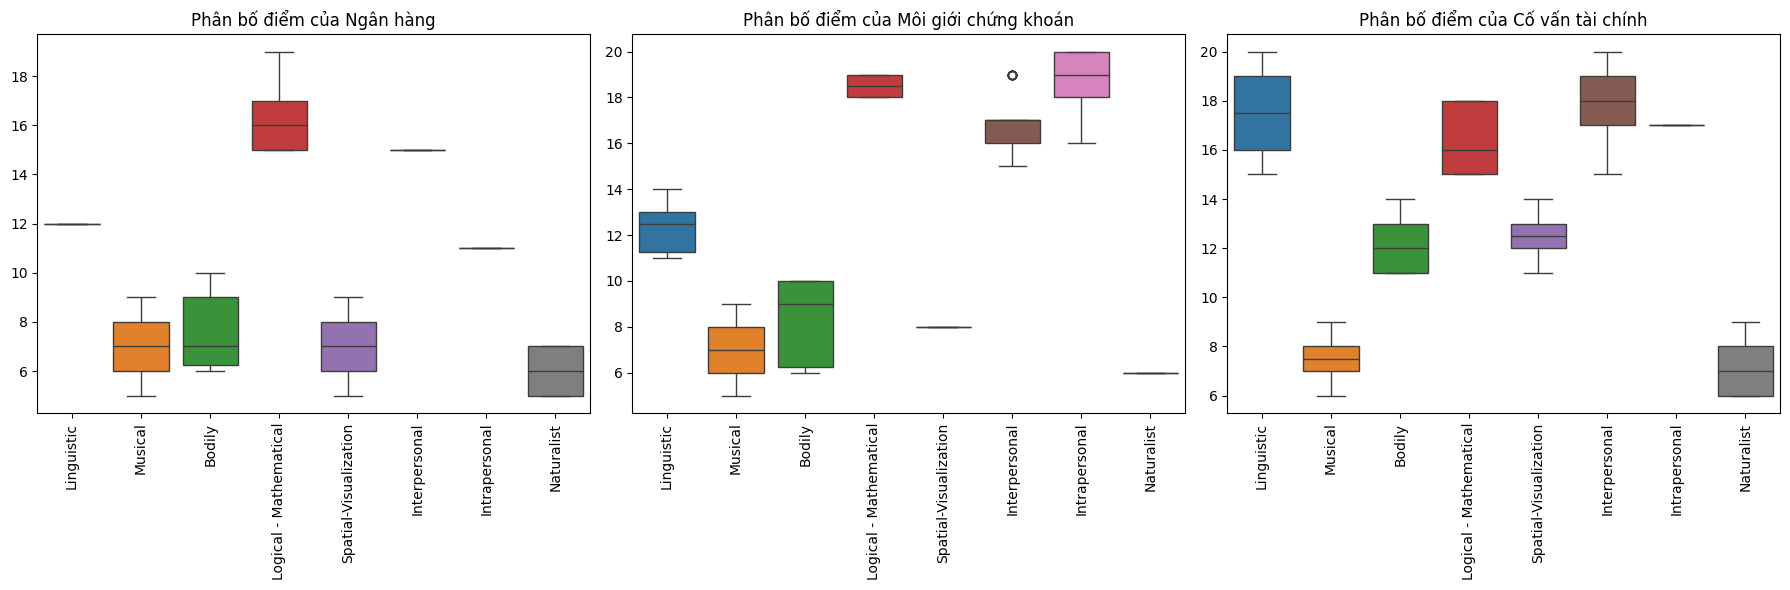

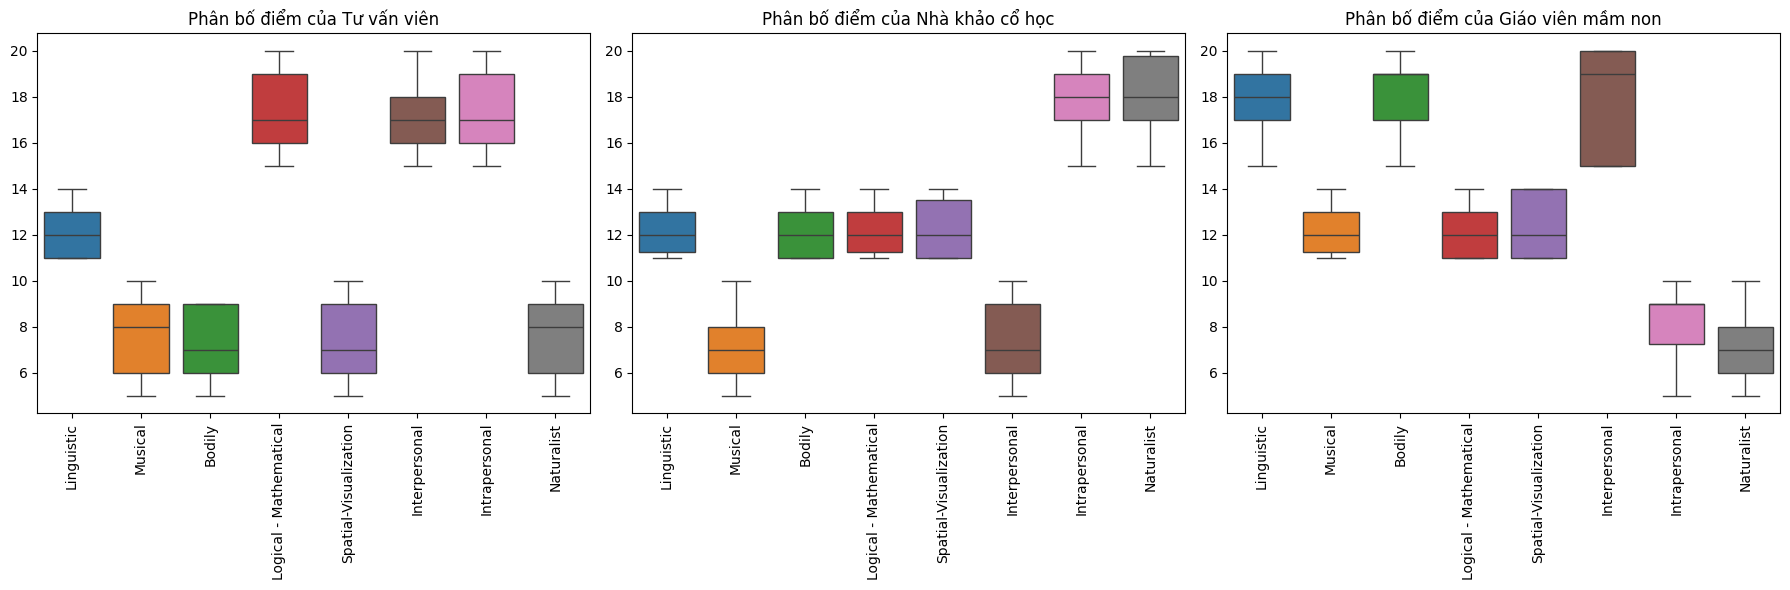

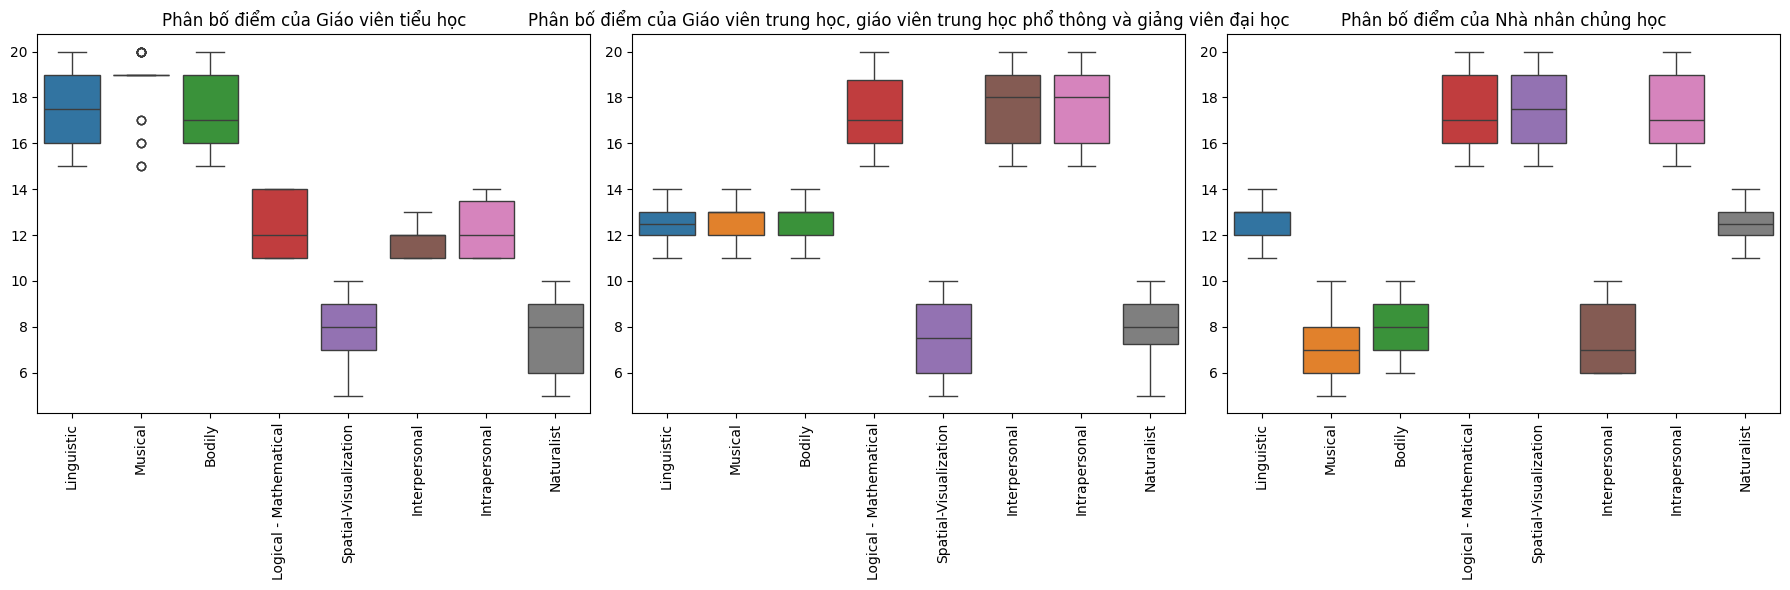

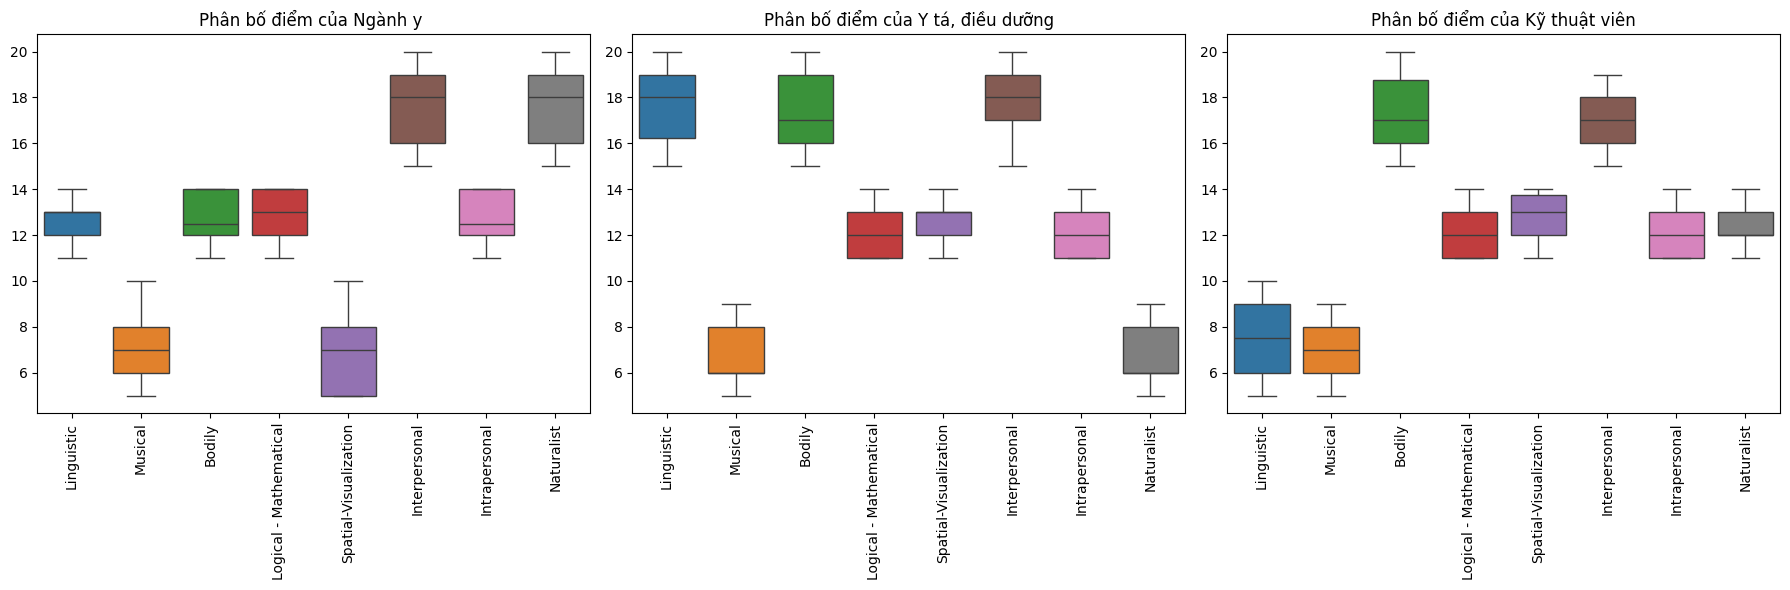

In [ ]:
import seaborn as sns

# Danh sách các cột điểm trí thông minh cần vẽ (tùy chỉnh theo dữ liệu của bạn)
intelligence_columns = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical',
                        'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']

# Chia danh sách ngành thành các nhóm, mỗi nhóm 3 ngành
for i in range(0, len(unique_jobs), 3):
    # Lấy nhóm 3 ngành (hoặc ít hơn nếu không đủ)
    group = unique_jobs[i:i + 3]

    # Tạo figure với 1 hàng và 3 cột
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Vẽ biểu đồ hộp cho từng ngành trong nhóm
    for j, profession in enumerate(group):
        # Lọc dữ liệu cho ngành hiện tại
        prof_data = df[df['Job profession'] == profession]

        # Vẽ biểu đồ hộp trong subplot tương ứng
        sns.boxplot(data=prof_data[intelligence_columns], ax=axes[j])
        axes[j].set_title(f'Phân bố điểm của {profession}')
        axes[j].tick_params(axis='x', rotation=90)  # Xoay nhãn trục x để dễ đọc

    # Ẩn subplot không sử dụng nếu nhóm không đủ 3 ngành
    for k in range(len(group), 3):
        axes[k].axis('off')

    plt.tight_layout()
    plt.show()

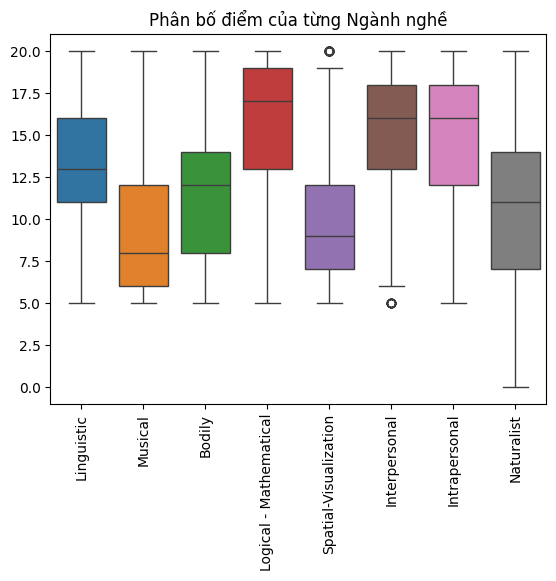

In [ ]:
sns.boxplot(data=df[intelligence_columns])
plt.title('Phân bố điểm của từng Ngành nghề')
plt.xticks(rotation=90)
plt.show()

Bước 3: Xây dựng mô hình và huấn luyện

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
feature_columns = intelligence_columns
features = df_cleaned[feature_columns].values
num_classes = len(label_mapping)

# Chia dữ liệu theo nhóm nghề nghiệp (80% train, 20% test)
grouped = df_cleaned.groupby('Job profession')
X_train_list, y_train_list, X_test_list, y_test_list = [], [], [], []

for _, group in grouped:
    X_group = group[feature_columns].values
    y_group = group['job_label'].values
    X_train_group, X_test_group, y_train_group, y_test_group = train_test_split(
        X_group, y_group, test_size=0.2, random_state=42
    )
    X_train_list.append(X_train_group)
    y_train_list.append(y_train_group)
    X_test_list.append(X_test_group)
    y_test_list.append(y_test_group)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

train_indices = np.arange(len(X_train))
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

test_indices = np.arange(len(X_test))
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# Hiển thị kích thước và dữ liệu tập train
print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)
print("Dữ liệu tập train:")
train_df = pd.DataFrame(X_train, columns=feature_columns)
train_df['job_label'] = y_train
train_df.head()

Kích thước tập train: (2728, 8)
Kích thước tập test: (687, 8)
Dữ liệu tập train:


,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist,job_label
0,0.000000,0.200000,0.800000,0.533333,0.533333,0.733333,0.533333,0.60,25
1,0.733333,0.133333,0.533333,0.866667,0.133333,0.800000,0.466667,0.45,68
2,0.866667,0.600000,0.133333,0.933333,0.066667,0.600000,0.933333,0.70,51
3,0.533333,0.066667,0.133333,0.866667,0.933333,0.466667,1.000000,0.35,23
4,0.466667,0.666667,0.200000,1.000000,0.000000,0.400000,0.600000,0.90,1


In [ ]:
import pickle
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, dropout_rate=0.4):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epsilon = 1e-8

        # Khởi tạo trọng số
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def dropout(self, X, dropout_rate):
        mask = np.random.binomial(1, 1 - dropout_rate, size=X.shape)
        return X * mask / (1 - dropout_rate), mask

    def forward(self, X, training=True):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        if training:
            self.a1, self.dropout_mask = self.dropout(self.a1, self.dropout_rate)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def cross_entropy_loss(self, output, y):
        y_one_hot = np.zeros((y.shape[0], self.output_size))
        y_one_hot[np.arange(y.shape[0]), y] = 1
        output = np.clip(output, self.epsilon, 1 - self.epsilon)
        return -np.mean(np.sum(y_one_hot * np.log(output), axis=1))

    def backward(self, X, y, output):
        y_one_hot = np.zeros((y.shape[0], self.output_size))
        y_one_hot[np.arange(y.shape[0]), y] = 1

        self.delta2 = output - y_one_hot
        self.error_hidden = np.dot(self.delta2, self.W2.T)
        self.delta1 = self.error_hidden * self.relu_derivative(self.a1) * self.dropout_mask / (1 - self.dropout_rate)

        grad_W2 = np.dot(self.a1.T, self.delta2)
        grad_b2 = np.sum(self.delta2, axis=0, keepdims=True)
        grad_W1 = np.dot(X.T, self.delta1)
        grad_b1 = np.sum(self.delta1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * grad_W2
        self.b2 -= self.learning_rate * grad_b2
        self.W1 -= self.learning_rate * grad_W1
        self.b1 -= self.learning_rate * grad_b1

    def train(self, X, y, epochs, batch_size=16, print_interval=100):
        losses = []
        n_samples = X.shape[0]

        for epoch in range(epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            total_loss = 0
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                output = self.forward(X_batch, training=True)
                self.backward(X_batch, y_batch, output)
                total_loss += self.cross_entropy_loss(output, y_batch) * len(X_batch)

            avg_loss = total_loss / n_samples
            losses.append(avg_loss)
            if (epoch + 1) % print_interval == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epochs + 1), losses, label='Loss')
        plt.title('Loss qua các Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

        return losses

    def predict(self, X):
        output = self.forward(X, training=False)
        predicted = np.argmax(output, axis=1)
        return predicted, output

    def predict_top_3(self, responses):
        feats = np.array([(responses[i] + responses[i+1]) for i in range(0, len(responses), 2)])
        feats = feats / 20.0
        feats = feats.reshape(1, -1)
        output = self.forward(feats, training=False)
        top3 = np.argsort(output[0])[::-1][:3]
        return [(label_mapping[i], output[0][i]) for i in top3]

    def evaluate(self, X, y):
        predicted, output = self.predict(X)
        accuracy = np.mean(predicted == y)
        confusion_matrix = np.zeros((self.output_size, self.output_size), dtype=int)
        for true, pred in zip(y, predicted):
            confusion_matrix[true][pred] += 1
        return accuracy, confusion_matrix

    def save_model(self, filepath):
        with open(filepath, 'wb') as f:
            pickle.dump({
                'W1': self.W1, 'b1': self.b1,
                'W2': self.W2, 'b2': self.b2,
                'label_mapping': label_mapping,
                'input_size': self.input_size,
                'hidden_size': self.hidden_size,
                'output_size': self.output_size,
                'dropout_rate': self.dropout_rate
            }, f)

Training model with learning rate: 0.001
Epoch 50/500, Loss: 1.4021
Epoch 100/500, Loss: 0.8669
Epoch 150/500, Loss: 0.6998
Epoch 200/500, Loss: 0.6206
Epoch 250/500, Loss: 0.5616
Epoch 300/500, Loss: 0.5081
Epoch 350/500, Loss: 0.4802
Epoch 400/500, Loss: 0.4484
Epoch 450/500, Loss: 0.4386
Epoch 500/500, Loss: 0.4203


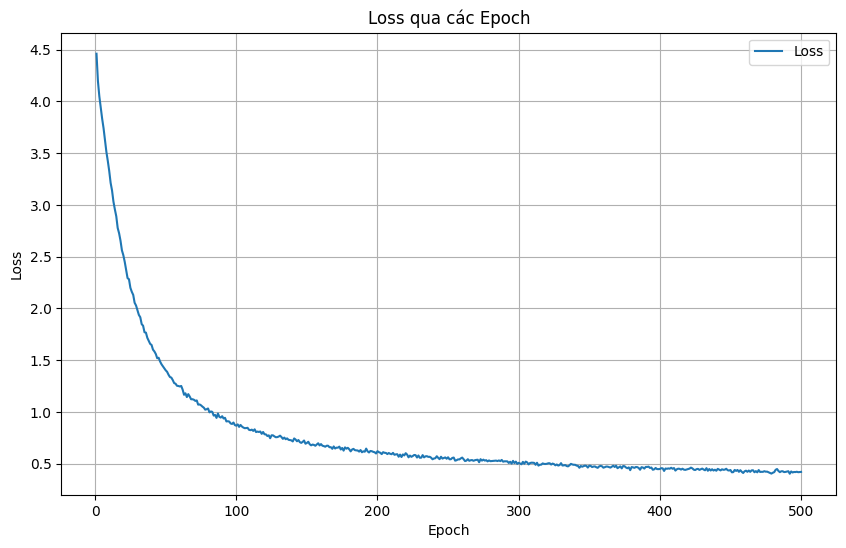

Training model with learning rate: 0.005
Epoch 50/500, Loss: 0.5761
Epoch 100/500, Loss: 0.4383
Epoch 150/500, Loss: 0.3879
Epoch 200/500, Loss: 0.3678
Epoch 250/500, Loss: 0.3481
Epoch 300/500, Loss: 0.3098
Epoch 350/500, Loss: 0.3016
Epoch 400/500, Loss: 0.2835
Epoch 450/500, Loss: 0.2915
Epoch 500/500, Loss: 0.2656


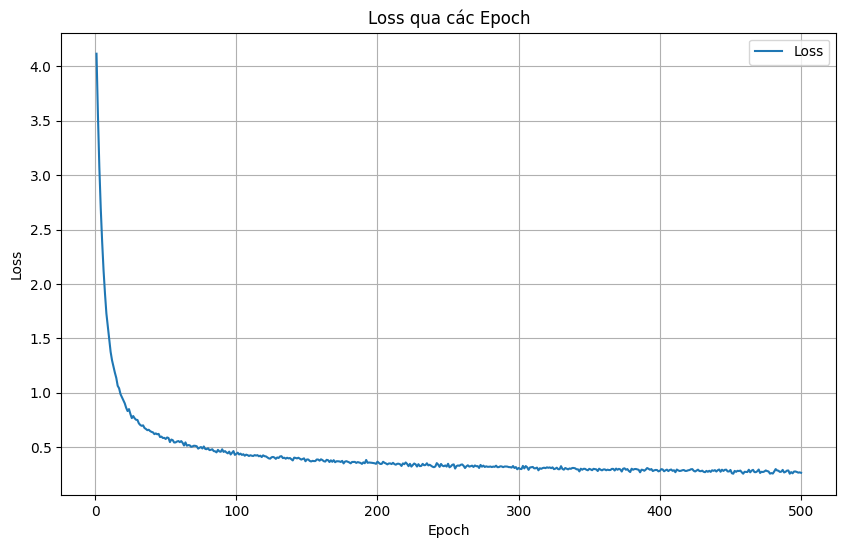

Training model with learning rate: 0.01
Epoch 50/500, Loss: 0.4704
Epoch 100/500, Loss: 0.3707
Epoch 150/500, Loss: 0.3407
Epoch 200/500, Loss: 0.3228
Epoch 250/500, Loss: 0.3137
Epoch 300/500, Loss: 0.2767
Epoch 350/500, Loss: 0.2698
Epoch 400/500, Loss: 0.2569
Epoch 450/500, Loss: 0.2742
Epoch 500/500, Loss: 0.2320


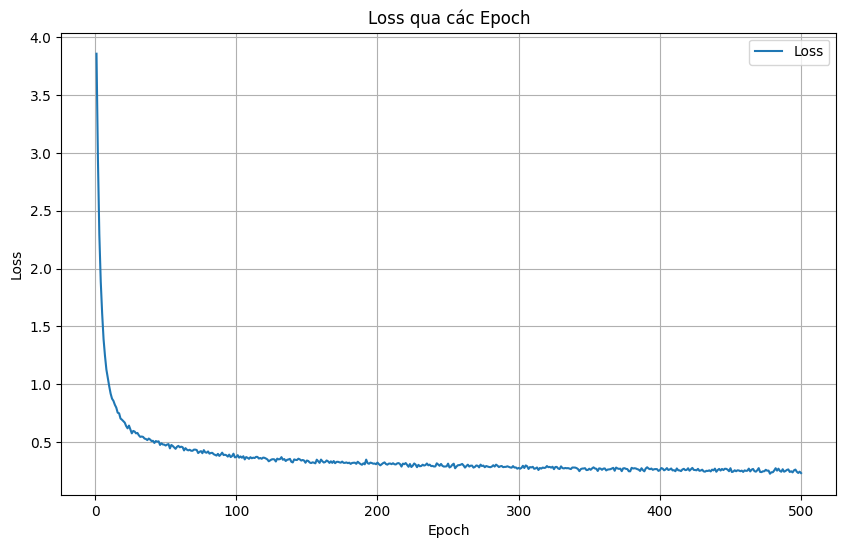

Training model with learning rate: 0.05
Epoch 50/500, Loss: 0.6723
Epoch 100/500, Loss: 0.5905
Epoch 150/500, Loss: 0.6466
Epoch 200/500, Loss: 0.7379
Epoch 250/500, Loss: 0.7509
Epoch 300/500, Loss: 0.8051
Epoch 350/500, Loss: 0.8075
Epoch 400/500, Loss: 0.7412
Epoch 450/500, Loss: 0.8936
Epoch 500/500, Loss: 0.8443


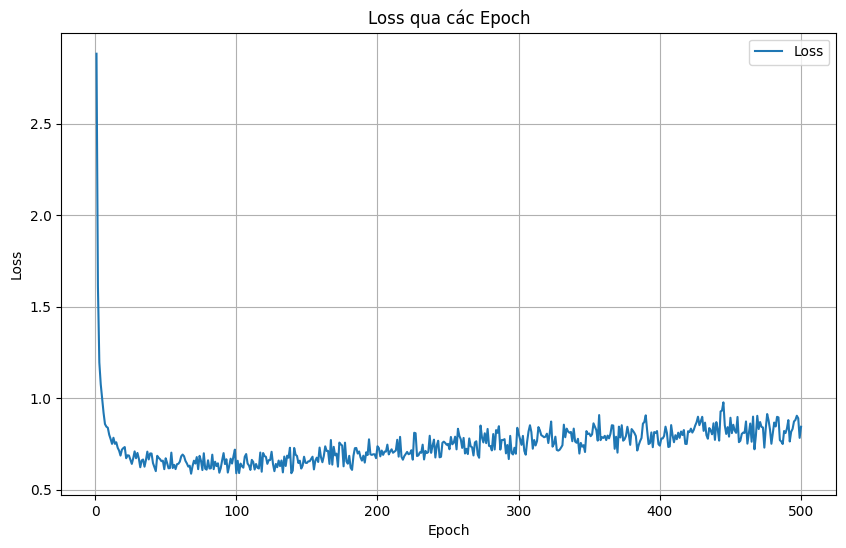

Training model with learning rate: 0.1
Epoch 50/500, Loss: 2.7192
Epoch 100/500, Loss: 3.0916
Epoch 150/500, Loss: 3.4062
Epoch 200/500, Loss: 3.6233
Epoch 250/500, Loss: 3.7531
Epoch 300/500, Loss: 3.9918
Epoch 350/500, Loss: 4.0543
Epoch 400/500, Loss: 4.1257
Epoch 450/500, Loss: 4.2687
Epoch 500/500, Loss: 4.2678


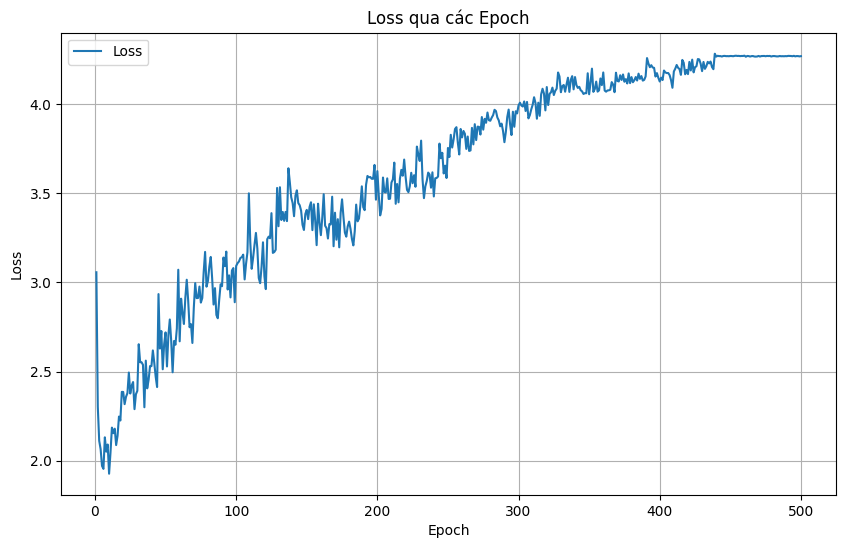

Learning rate 0.001: Reached loss < 0.5 at epoch 299
Learning rate 0.005: Reached loss < 0.5 at epoch 73
Learning rate 0.01: Reached loss < 0.5 at epoch 42


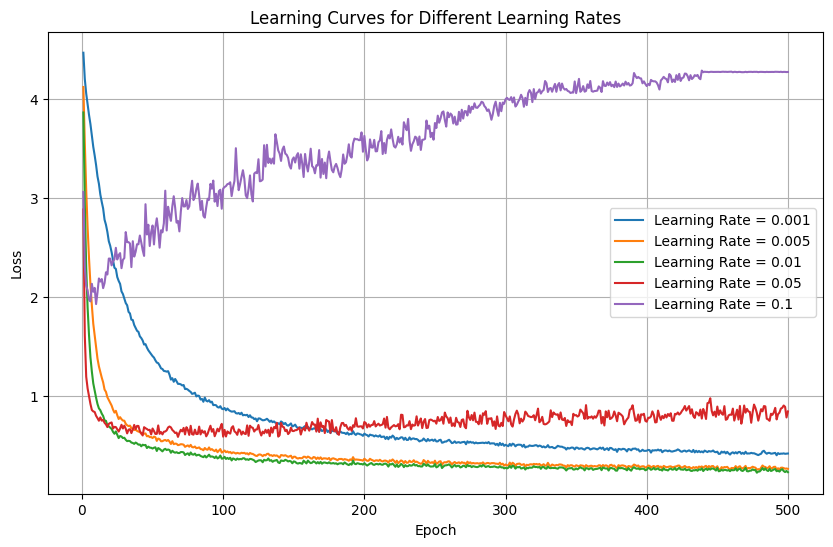

In [ ]:
# Define learning rates to test
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
epochs = 500

# Store losses for each learning rate
losses_per_lr = {}

# Create and train models for each learning rate
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    mlp = MLP(input_size=8, hidden_size=64, output_size=num_classes, learning_rate=lr, dropout_rate=0.4)
    losses = mlp.train(X_train, y_train, epochs=epochs, batch_size=16, print_interval=50)
    losses_per_lr[lr] = losses

# Plotting learning curves
plt.figure(figsize=(10, 6))
for lr, losses in losses_per_lr.items():
    plt.plot(range(1, epochs + 1), losses, label=f'Learning Rate = {lr}')

    # Find first epoch where loss < 0.5
    for i, loss in enumerate(losses):
        if loss < 0.5:
            print(f"Learning rate {lr}: Reached loss < 0.5 at epoch {i+1}")
            break
plt.title('Learning Curves for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 50/500, Loss: 0.4704
Epoch 100/500, Loss: 0.3707
Epoch 150/500, Loss: 0.3407
Epoch 200/500, Loss: 0.3228
Epoch 250/500, Loss: 0.3137
Epoch 300/500, Loss: 0.2767
Epoch 350/500, Loss: 0.2698
Epoch 400/500, Loss: 0.2569
Epoch 450/500, Loss: 0.2742
Epoch 500/500, Loss: 0.2320


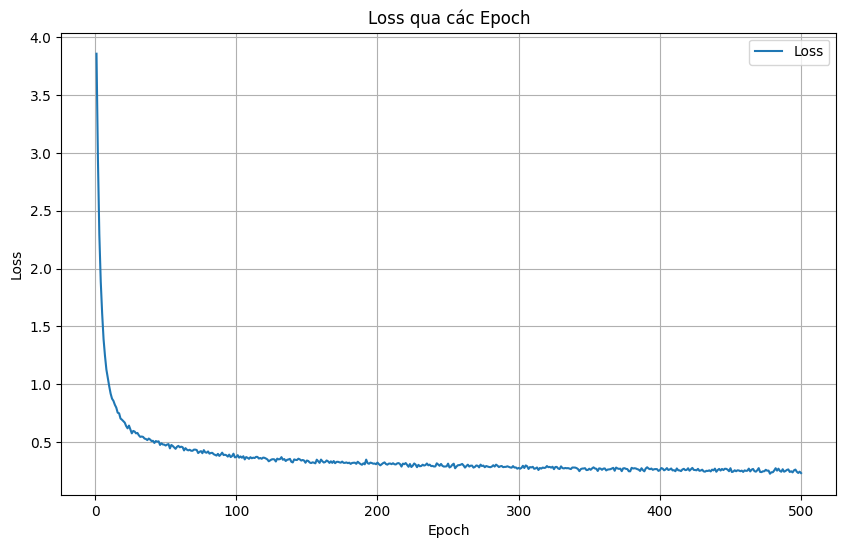


Độ chính xác trên tập train: 0.9619


In [ ]:
# --- Huấn luyện và đánh giá ---
mlp = MLP(input_size=8, hidden_size=64, output_size=num_classes, learning_rate=0.01, dropout_rate=0.4)
mlp.train(X_train, y_train, epochs=500, batch_size=16, print_interval=50)

# Đánh giá trên tập train
train_accuracy, train_cm = mlp.evaluate(X_train, y_train)
print(f"\nĐộ chính xác trên tập train: {train_accuracy:.4f}")

In [ ]:
test_pred, _ = mlp.predict(X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f"Độ chính xác trên tập test: {test_accuracy:.4f}")

Độ chính xác trên tập test: 0.9374


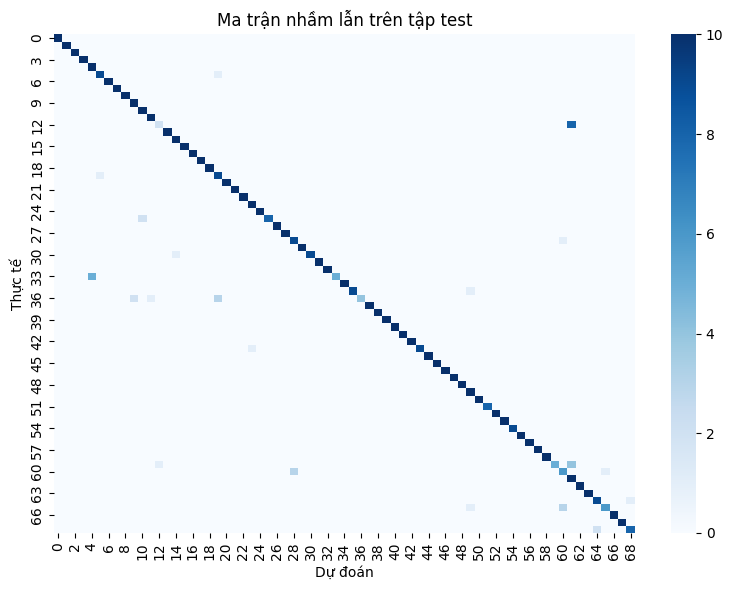

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_cm = confusion_matrix(y_test, test_pred)
unique_labels = np.unique(np.concatenate([y_test, test_pred]))
label_names = [label_mapping.get(i, f"{i}") for i in unique_labels]


plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=False, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn trên tập test')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.tight_layout()
plt.show()

In [ ]:
synthetic_data = [
    [8, 7, 6, 5, 9, 8, 7, 6, 5, 4, 8, 7, 6, 5, 9, 8],  # Bodily
    [6, 5, 4, 3, 5, 4, 9, 8, 7, 6, 6, 5, 5, 4, 3, 2],  # Logical
    [9, 8, 5, 4, 6, 5, 4, 3, 5, 4, 7, 6, 6, 5, 4, 3],  # Linguistic
    [5, 4, 9, 8, 6, 5, 4, 3, 5, 4, 6, 5, 4, 3, 7, 6],  # Musical
    [6, 5, 5, 4, 5, 4, 6, 5, 9, 8, 7, 6, 5, 4, 4, 3]   # Spatial
]
print("\nDự đoán trên dữ liệu giả (chỉ để test):")
for data in synthetic_data:
    top_3 = mlp.predict_top_3(data)
    print(f"Dữ liệu: {data}")
    for profession, prob in top_3:
        # print(f"{profession}: {prob:.4f}")
        print(f"{profession}")
    print()



Dự đoán trên dữ liệu giả (chỉ để test):
Dữ liệu: [8, 7, 6, 5, 9, 8, 7, 6, 5, 4, 8, 7, 6, 5, 9, 8]
Phát thanh viên
Dược sĩ
Nhà địa chất học

Dữ liệu: [6, 5, 4, 3, 5, 4, 9, 8, 7, 6, 6, 5, 5, 4, 3, 2]
Nhà thiết kế đồ họa
Nhà toán học
Thư ký công ty

Dữ liệu: [9, 8, 5, 4, 6, 5, 4, 3, 5, 4, 7, 6, 6, 5, 4, 3]
Y tá, điều dưỡng
Giáo viên tiểu học
Giáo viên mầm non

Dữ liệu: [5, 4, 9, 8, 6, 5, 4, 3, 5, 4, 6, 5, 4, 3, 7, 6]
Giáo viên âm nhạc
Giáo viên tiểu học
Biên tập viên âm thanh

Dữ liệu: [6, 5, 5, 4, 5, 4, 6, 5, 9, 8, 7, 6, 5, 4, 4, 3]
Nhà thiết kế đồ họa
Nhà toán học
Giáo viên mầm non



In [ ]:
model_path = '/content/drive/MyDrive/Semes_4/AI/job_recommendation_final3/model.pkl'
mlp.save_model(model_path)
print(f"Mô hình đã được lưu vào: {model_path}")

Mô hình đã được lưu vào: /content/drive/MyDrive/Semes_4/AI/job_recommendation_final3/model.pkl
